# Memuat *File*

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
FILES_ROOT_PATH = '/content/gdrive/MyDrive/TK-KASDD/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Impor *Package*

In [ ]:
!pip install catboost

In [ ]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier, HistGradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, mean_absolute_error,\
    mean_squared_error, r2_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer
from xgboost import XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.multioutput import MultiOutputRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [ ]:
sns.set()

# Eksplorasi

In [ ]:
games = pd.read_csv(FILES_ROOT_PATH + 'games.csv')
matches = pd.read_csv(FILES_ROOT_PATH + 'matches.csv')
scores = pd.read_csv(FILES_ROOT_PATH + 'scores.csv')

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12961 entries, 0 to 12960
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 12961 non-null  int64  
 1   GameID             12961 non-null  int64  
 2   MatchID            12961 non-null  int64  
 3   Map                12961 non-null  object 
 4   Team1ID            12961 non-null  int64  
 5   Team2ID            12961 non-null  int64  
 6   Team1              12961 non-null  object 
 7   Team2              12961 non-null  object 
 8   Winner             12961 non-null  int64  
 9   Team1_Eco          11927 non-null  float64
 10  Team1_SemiEco      11927 non-null  float64
 11  Team1_SemiBuy      11927 non-null  float64
 12  Team1_FullBuy      11927 non-null  float64
 13  Team1_TotalRounds  12961 non-null  int64  
 14  Team2_Eco          11927 non-null  float64
 15  Team2_SemiEco      11927 non-null  float64
 16  Team2_SemiBuy      119

In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6401 entries, 0 to 6400
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   No              6401 non-null   int64 
 1   MatchID         6401 non-null   int64 
 2   Date            6401 non-null   object
 3   Patch           5990 non-null   object
 4   EventID         6401 non-null   int64 
 5   EventName       6401 non-null   object
 6   EventStage      6401 non-null   object
 7   Team1ID         6401 non-null   int64 
 8   Team2ID         6401 non-null   int64 
 9   Team1           6401 non-null   object
 10  Team2           6401 non-null   object
 11  Team1_MapScore  6401 non-null   int64 
 12  Team2_MapScore  6401 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 650.2+ KB


In [ ]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128779 entries, 0 to 128778
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   No                128779 non-null  int64  
 1   GameID            128779 non-null  int64  
 2   PlayerID          128692 non-null  float64
 3   PlayerName        128779 non-null  object 
 4   TeamAbbreviation  126763 non-null  object 
 5   Agent             124679 non-null  object 
 6   ACS               128249 non-null  float64
 7   Kills             128289 non-null  float64
 8   Deaths            128289 non-null  float64
 9   Assists           128289 non-null  float64
 10  PlusMinus         127026 non-null  float64
 11  KAST_Percent      2637 non-null    float64
 12  ADR               119904 non-null  float64
 13  HS_Percent        119307 non-null  float64
 14  FirstKills        128249 non-null  float64
 15  FirstDeaths       119314 non-null  float64
 16  FKFD_PlusMinus    11

In [ ]:
acs_agent = scores.loc[:, ['ACS', 'Agent']]
acs_agent = acs_agent.dropna()
acs_agent

ACS      Agent
0       313.0       jett
1       227.0    chamber
2       226.0       sova
3       218.0      viper
4        80.0       skye
...       ...        ...
127989  312.0       sage
127990  255.0    phoenix
127991  240.0     cypher
127992  163.0       sova
127993  133.0  brimstone

[124514 rows x 2 columns]

In [ ]:
agent_names = acs_agent.Agent.unique()
acs_agent_dict = {}
for name in agent_names:
  acs_agent_dict[name] = acs_agent.loc[acs_agent.Agent == name].ACS

<Axes: >

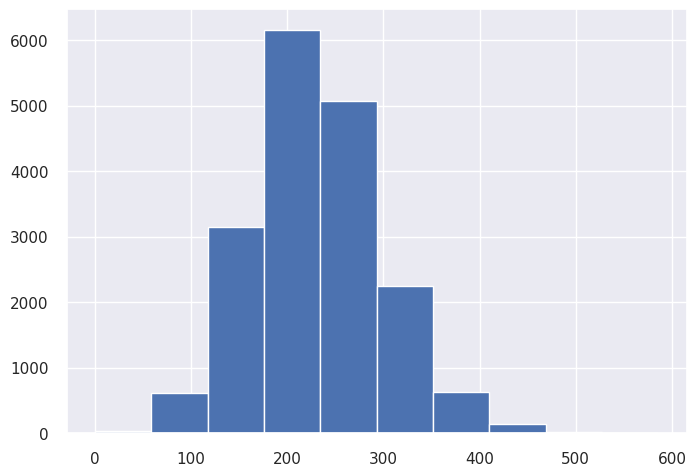

In [ ]:
acs_agent_dict['jett'].hist()

<Axes: >

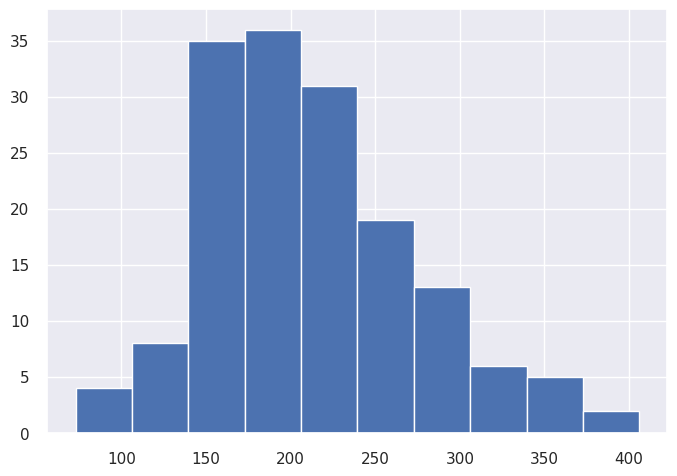

In [ ]:
acs_agent_dict['chamber'].hist()

<Axes: >

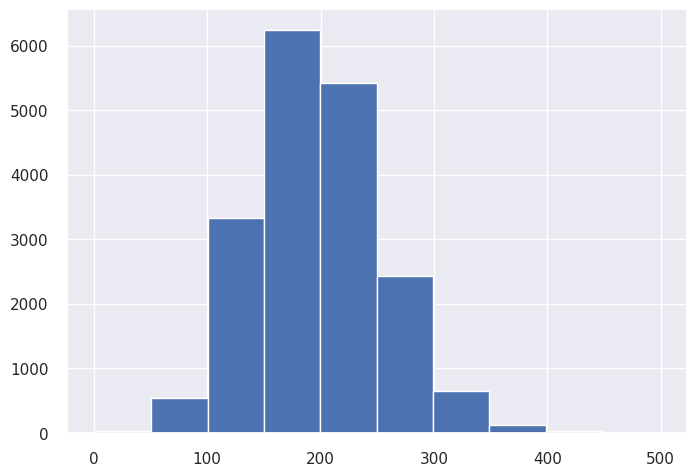

In [ ]:
acs_agent_dict['sova'].hist()

<Axes: >

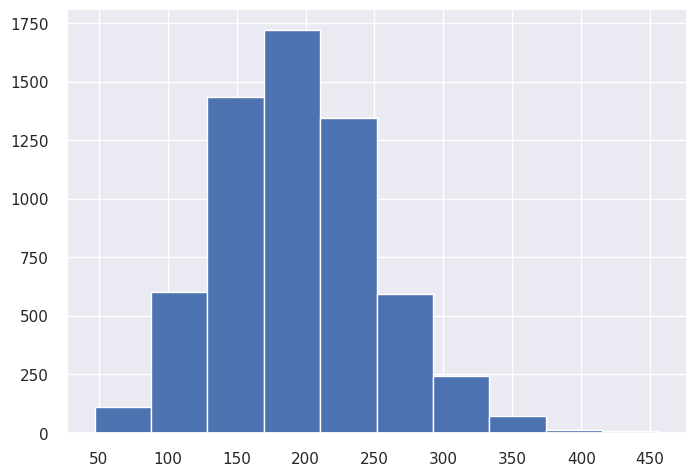

In [ ]:
acs_agent_dict['viper'].hist()

<Axes: >

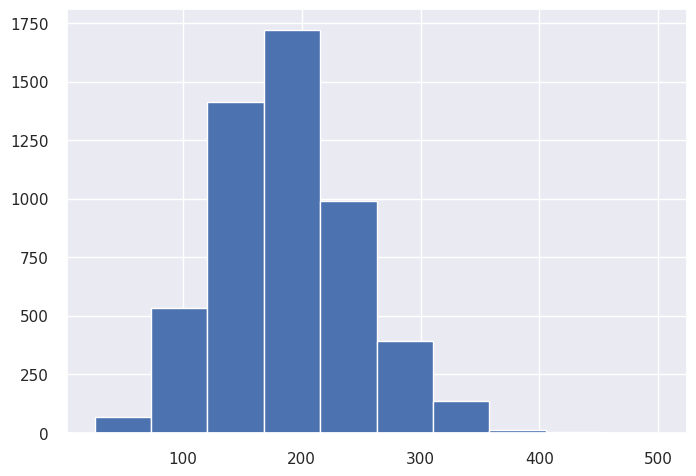

In [ ]:
acs_agent_dict['skye'].hist()

<Axes: >

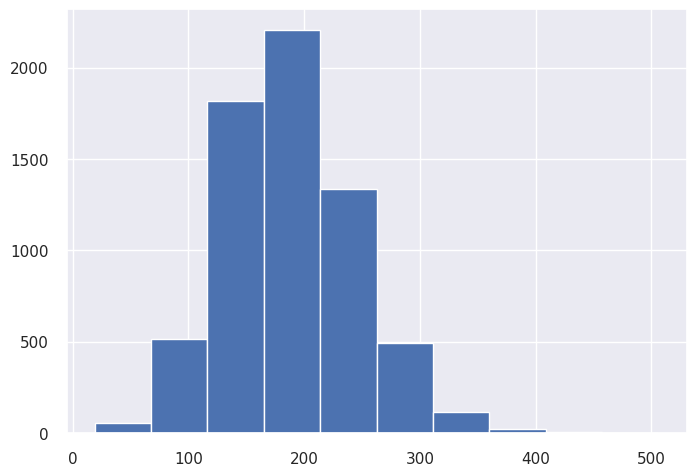

In [ ]:
acs_agent_dict['astra'].hist()

<Axes: >

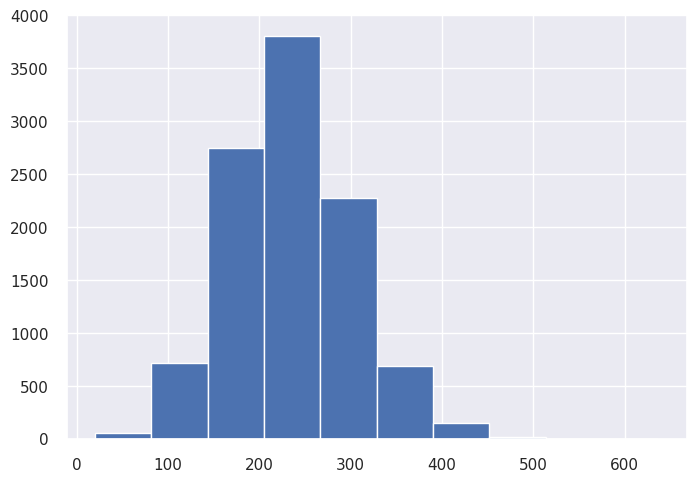

In [ ]:
acs_agent_dict['raze'].hist()

<Axes: >

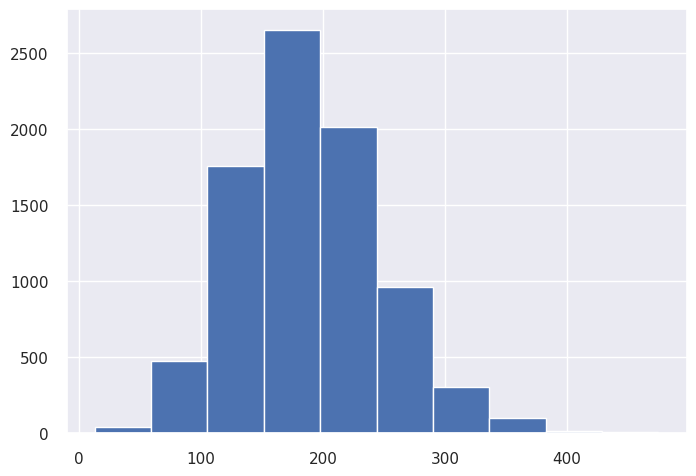

In [ ]:
acs_agent_dict['sage'].hist()

<Axes: >

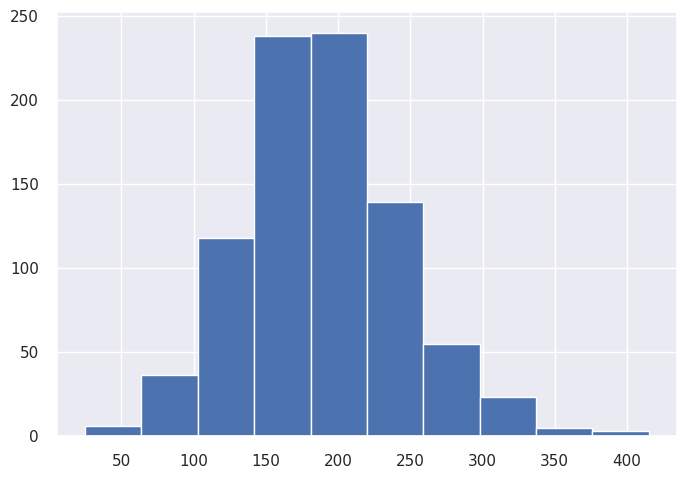

In [ ]:
acs_agent_dict['kayo'].hist()

<Axes: >

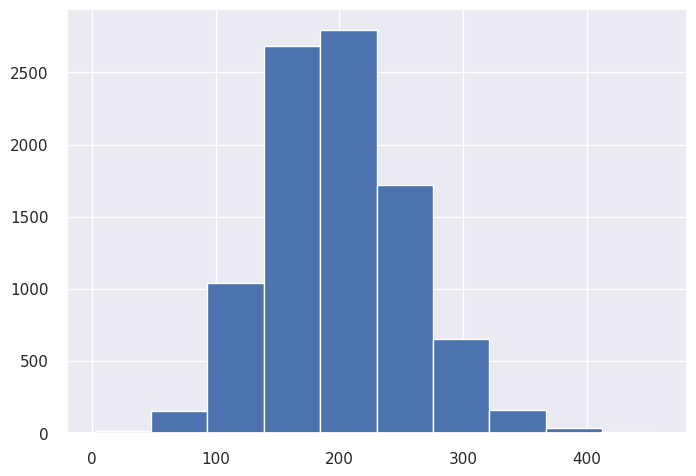

In [ ]:
acs_agent_dict['killjoy'].hist()

<Axes: >

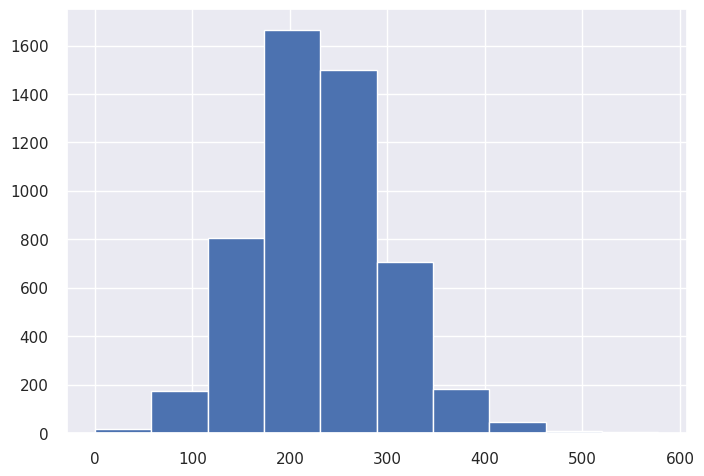

In [ ]:
acs_agent_dict['reyna'].hist()

<Axes: >

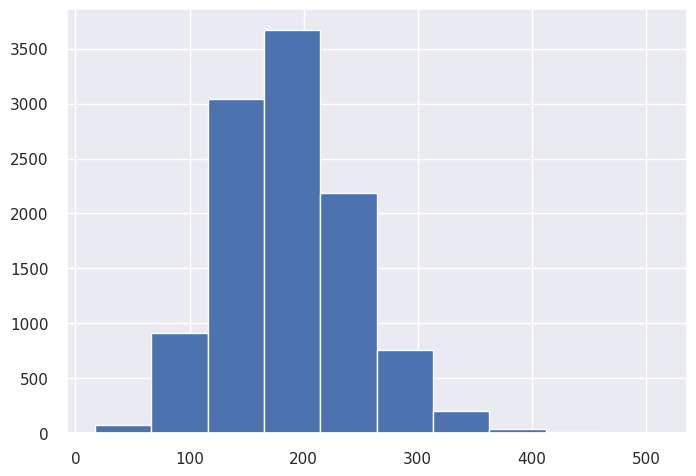

In [ ]:
acs_agent_dict['cypher'].hist()

<Axes: >

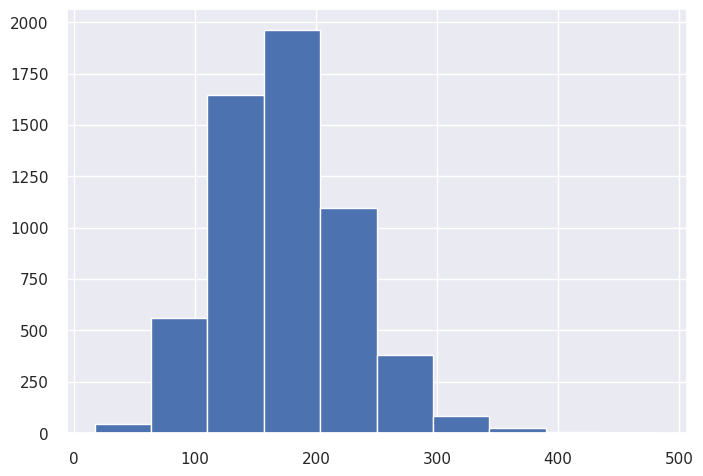

In [ ]:
acs_agent_dict['breach'].hist()

<Axes: >

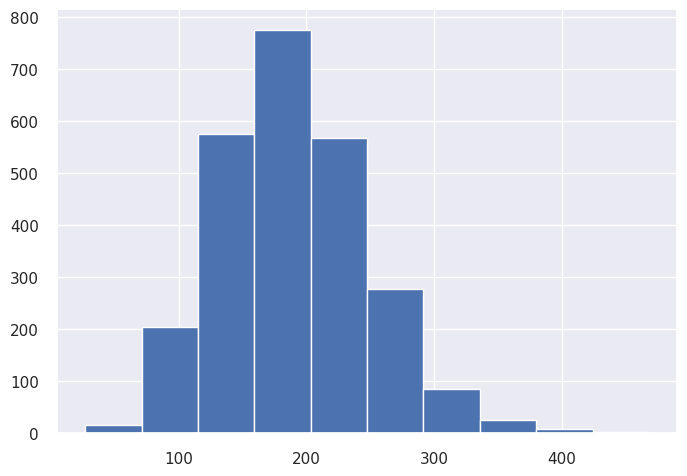

In [ ]:
acs_agent_dict['brimstone'].hist()

<Axes: >

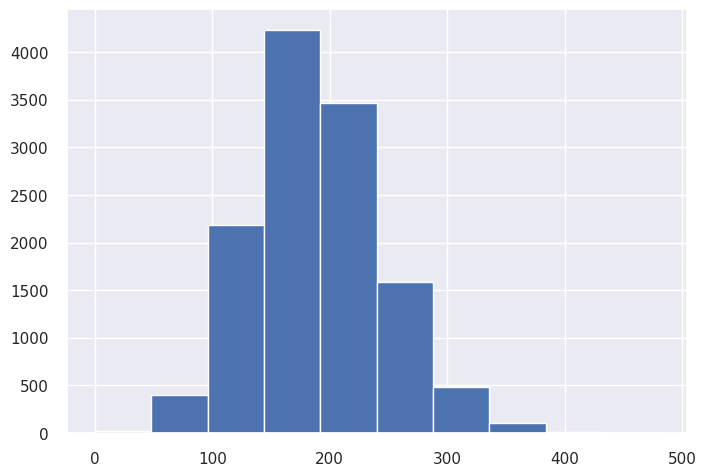

In [ ]:
acs_agent_dict['omen'].hist()

<Axes: >

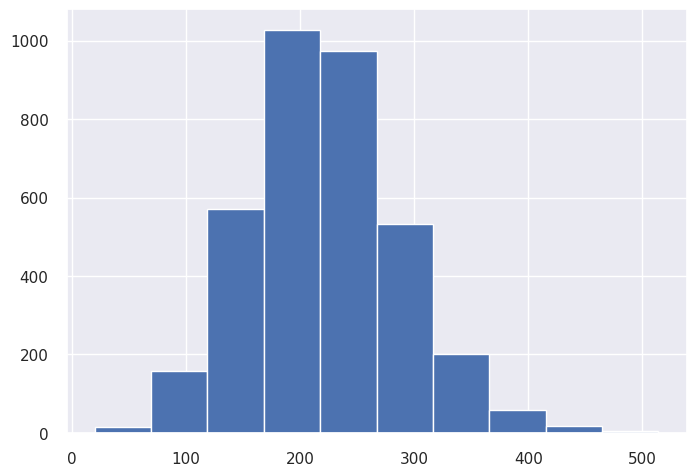

In [ ]:
acs_agent_dict['phoenix'].hist()

<Axes: >

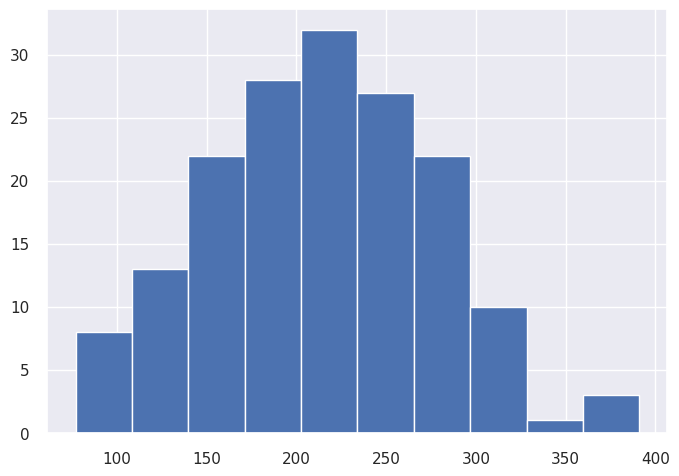

In [ ]:
acs_agent_dict['yoru'].hist()

### Siapa tim yang paling banyak memenangkan pertandingan grand final dari sebuah Event?

In [ ]:
grand_finals = matches[matches['EventStage'].str.lower().str.contains('grandfinal') | (matches['EventStage'].str.lower().str.contains('grand final'))]

winning_teams = grand_finals.apply(lambda row: row['Team1'] if row['Team1_MapScore'] >= 2 else row['Team2'], axis=1).value_counts().reset_index()
winning_teams.columns = ['Team', 'Occurence']

winning_teams[winning_teams['Occurence'] == winning_teams['Occurence'][0]]

Team  Occurence
0  Sentinels          9

### Komposisi tim seperti apakah yang paling banyak memenangkan pertandingan?

In [ ]:
# Identifikasi pemenang pertandingan
matches['Winnerz'] = matches.apply(lambda row: row.Team1 if row.Team1_MapScore > row.Team2_MapScore else row.Team2, axis=1)
# Gabungkan data matches dan scores
merged = pd.merge(pd.merge(matches, games, on='MatchID'), scores, on='GameID')
# Filter data untuk hanya mencakup pertandingan yang dimenangkan
test = merged['TeamAbbreviation'] == merged['Winnerz']
winners = merged[merged['TeamAbbreviation'] == merged['Winnerz']]
# Buat kolom baru dengan string agent
winners['AgentString'] = winners['Agent'].astype(str)
# Hitung frekuensi setiap kombinasi agent dalam pertandingan yang dimenangkan
agent_combinations = winners.groupby('GameID')['AgentString'].apply(lambda x: ', '.join(x)).value_counts()
agent_combinations.to_csv('combination.csv')

<ipython-input-490-2d2cc3ff1823>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners['AgentString'] = winners['Agent'].astype(str)


In [ ]:
df = pd.read_csv('combination.csv', header=None, names=['AgentString', 'Occurence']).dropna()

# Ubah AgentString menjadi list dan sortir
df['AgentString'] = df['AgentString'].apply(lambda x: sorted(x.split(', ')))

# Konversi list menjadi tuple
df['AgentTuples'] = df['AgentString'].apply(tuple)

# Hitung frekuensi setiap komposisi tim
frequency = df['AgentTuples'].value_counts()

# Mendapatkan komposisi tim yang paling sering muncul
most_common_team_composition = frequency.idxmax()

print(most_common_team_composition)

('cypher', 'jett', 'omen', 'phoenix', 'sova')


Didapatkan bahwa Cypher, Jett, Omen, Pheonix, Sova merupakan komposisi tim yang sesuai.

# Klasifikasi

### Inisiasi Dataset

In [ ]:
matches = pd.read_csv(FILES_ROOT_PATH + 'matches.csv')
games = pd.read_csv(FILES_ROOT_PATH + 'games.csv')
scores = pd.read_csv(FILES_ROOT_PATH + 'scores.csv')
matches_test = pd.read_csv(FILES_ROOT_PATH + 'matches_test.csv')
games_test = pd.read_csv(FILES_ROOT_PATH + 'games_test.csv')
scores_test = pd.read_csv(FILES_ROOT_PATH + 'scores_test.csv')
encoded_agent = pd.read_csv(FILES_ROOT_PATH + 'agent_encode.csv')

In [ ]:
matches.head()

No  MatchID                 Date       Patch  EventID  \
0   0    62393  2022-01-08 15:30:00  Patch 3.12      826   
1   1    62403  2022-01-08 15:30:00  Patch 3.12      826   
2   2    62391  2022-01-08 12:30:00  Patch 3.12      826   
3   3    62396  2022-01-08 12:30:00  Patch 3.12      826   
4   5    62402  2022-01-08 12:30:00  Patch 3.12      826   

                                           EventName  \
0  Nerd Street Gamers Winter Championship - Regio...   
1  Nerd Street Gamers Winter Championship - Regio...   
2  Nerd Street Gamers Winter Championship - Regio...   
3  Nerd Street Gamers Winter Championship - Regio...   
4  Nerd Street Gamers Winter Championship - Regio...   

                     EventStage  Team1ID  Team2ID                Team1  \
0      Group Stage: Decider (A)     6903     6020  Booster Seat Gaming   
1      Group Stage: Decider (C)     7046     7047       Bjor's Kittens   
2     Group Stage: Winner's (A)     6461     6903                Akrew   
3     Group Stage: Winner's (B)     6164     7043             Radiance   
4  Group Stage: Elimination (C)     7047     3545             Mugiwara   

                 Team2  Team1_MapScore  Team2_MapScore  
0             Pho Real               2               1  
1             Mugiwara               2               0  
2  Booster Seat Gaming               2               1  
3          sameROFLMAO               2               0  
4              CLG Red               2               0

In [ ]:
games.head()

No  GameID  MatchID     Map  Team1ID  Team2ID                Team1  \
0   0   60894    62393  Breeze     6903     6020  Booster Seat Gaming   
1   1   60895    62393    Bind     6903     6020  Booster Seat Gaming   
2   2   60896    62393   Haven     6903     6020  Booster Seat Gaming   
3   3   60924    62403  Icebox     7046     7047       Bjor's Kittens   
4   4   60925    62403   Haven     7046     7047       Bjor's Kittens   

      Team2  Winner  Team1_Eco  Team1_SemiEco  Team1_SemiBuy  Team1_FullBuy  \
0  Pho Real       1        2.0            0.0            5.0           13.0   
1  Pho Real       2        3.0            3.0            5.0            4.0   
2  Pho Real       1        2.0            2.0            5.0           12.0   
3  Mugiwara       1        2.0            2.0            4.0           11.0   
4  Mugiwara       1        4.0            2.0            3.0           13.0   

   Team1_TotalRounds  Team2_Eco  Team2_SemiEco  Team2_SemiBuy  Team2_FullBuy  \
0                 13        4.0            2.0            4.0           10.0   
1                  2        2.0            0.0            4.0            9.0   
2                 13        2.0            2.0            6.0           11.0   
3                 13        4.0            1.0            2.0           12.0   
4                 13        3.0            3.0            4.0           12.0   

   Team2_TotalRounds  
0                  7  
1                 13  
2                  8  
3                  6  
4                  9

In [ ]:
scores.head()

No  GameID  PlayerID PlayerName TeamAbbreviation    Agent    ACS  Kills  \
0   0   60894    8419.0     Reduxx             Boos     jett  313.0   24.0   
1   1   60894     466.0     ChurmZ             Boos  chamber  227.0   16.0   
2   2   60894    3712.0   diaamond             Boos     sova  226.0   17.0   
3   3   60894    5099.0     Boltzy             Boos    viper  218.0   17.0   
4   4   60894    3983.0     Virtyy             Boos     skye   80.0    5.0   

   Deaths  Assists  ...  Num_4Ks  Num_5Ks  OnevOne  OnevTwo  OnevThree  \
0    10.0      3.0  ...      2.0      0.0      1.0      0.0        0.0   
1    10.0      7.0  ...      0.0      0.0      0.0      0.0        0.0   
2     9.0      8.0  ...      0.0      0.0      1.0      0.0        0.0   
3    12.0      2.0  ...      0.0      0.0      1.0      0.0        0.0   
4    13.0      3.0  ...      0.0      0.0      0.0      0.0        0.0   

   OnevFour  OnevFive  Econ  Plants  Defuses  
0       0.0       0.0  74.0     0.0      0.0  
1       0.0       0.0  67.0     2.0      0.0  
2       0.0       0.0  58.0     3.0      0.0  
3       0.0       0.0  48.0     0.0      0.0  
4       0.0       0.0  21.0     0.0      0.0  

[5 rows x 29 columns]

In [ ]:
# Remove column yang secara intuitif tidak begitu penting

matches.drop(['Date', 'Patch', 'EventID', 'EventName', 'EventStage', 'Team1', 'Team2'],axis=1,inplace=True)
matches_test.drop(['Date', 'Patch', 'EventID', 'EventName', 'EventStage', 'Team1', 'Team2'],axis=1,inplace=True)
games.drop(['Team1', 'Team2'],axis=1,inplace=True)
games_test.drop(['Team1', 'Team2'],axis=1,inplace=True)
scores.drop(['PlayerName', 'TeamAbbreviation'], axis=1, inplace=True)
scores_test.drop(['PlayerName', 'TeamAbbreviation'], axis=1, inplace=True)

In [ ]:
# Check Null Value
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

# Check Outlier
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)

    # Calculate the total number of outliers across all columns
    total_outliers = outliers.sum().sum()
    total_rows = df.shape[0]

    # Cek persentase outlier
    percentage_outliers_per_column = (outliers.sum() / total_rows) * 100

    # Buat df
    result_df = pd.DataFrame({
        'Total': outliers.sum(),
        'Percent': (outliers.sum() / total_rows * 100)
    })

    print("Outlier pada tiap atribut:")
    print(result_df)

# Handle null untuk df (remove)
def remove_null_rows(df):
    df_cleaned = df.dropna()

    return df_cleaned

# Handle null untuk df tapi untuk kolom tertentu
def remove_null_row_if_column(df, col):
  condition = df[col].notnull()
  df_selective_removed = df[condition]

  return df_selective_removed

# Fill dengan 0
def fill_with_0(df, cols):
  df_filled_selective = df
  for col in cols:
    df_filled_selective[col] = df_filled_selective[col].fillna(0)

  return df_filled_selective

# Fill dengan median
def fill_with_median(df, cols):
  df_filled_selective = df
  for col in cols:
    df_filled_selective[col] = df_filled_selective[col].fillna(df_filled_selective[col].median())

  return df_filled_selective

# Fill dengan modus
def fill_with_mode(df, cols):
  df_filled_selective = df
  for col in cols:
    df_filled_selective[col] = df_filled_selective[col].fillna(df_filled_selective[col].mode()[0])

  return df_filled_selective

In [ ]:
check_null(matches)

Tidak ditemukan missing value pada dataset


In [ ]:
print("----Informasi Baris dan Kolom (Scores)----")
print("Baris : ", matches.shape[0])
print("Kolom : ", matches.shape[1])

----Informasi Baris dan Kolom (Scores)----
Baris :  6401
Kolom :  6


In [ ]:
check_null(games)

               Total   Percent
Team1_Eco       1034  0.079778
Team2_FullBuy   1034  0.079778
Team1_SemiBuy   1034  0.079778
Team1_FullBuy   1034  0.079778
Team2_Eco       1034  0.079778
Team2_SemiEco   1034  0.079778
Team2_SemiBuy   1034  0.079778
Team1_SemiEco   1034  0.079778


In [ ]:
# Karena jumlahnya sama di remove aja row yang null
games = remove_null_rows(games)

In [ ]:
check_null(scores)

                 Total   Percent
PlayerID            87  0.000676
Kills              490  0.003805
Deaths             490  0.003805
Assists            490  0.003805
ACS                530  0.004116
FirstKills         530  0.004116
PlusMinus         1753  0.013612
Agent             4100  0.031837
ADR               8875  0.068917
FKFD_PlusMinus    9465  0.073498
FirstDeaths       9465  0.073498
HS_Percent        9472  0.073552
Plants           10195  0.079167
Num_2Ks          10195  0.079167
Num_3Ks          10195  0.079167
Num_4Ks          10195  0.079167
Num_5Ks          10195  0.079167
OnevOne          10195  0.079167
OnevTwo          10195  0.079167
OnevThree        10195  0.079167
OnevFour         10195  0.079167
OnevFive         10195  0.079167
Econ             10195  0.079167
Defuses          10195  0.079167
KAST_Percent    126142  0.979523


In [ ]:
# Remove baris yang penting
scores = remove_null_row_if_column(scores, 'PlayerID')
scores = remove_null_row_if_column(scores, 'ACS')
scores = remove_null_row_if_column(scores, 'Agent')
# Isi 'ADR' dan 'HS_Percent' dengan median
fill_with_median(scores, ['ADR', 'HS_Percent'])
# Isi 'FirstDeaths' dan 'FKFD_PlusMinus' dengan modus karena kategorikal
fill_with_mode(scores, ['FirstDeaths','FKFD_PlusMinus'])
# Anggap saja semua array dibawah memang seharusnya 0 karena tidak semua player bisa clutch, multikill, dkk
fill_with_0(scores, ['Plants', 'Num_2Ks', 'Num_3Ks', 'Num_4Ks', 'Num_5Ks', 'OnevOne', 'OnevTwo', 'OnevThree', 'OnevFour', 'OnevFive', 'Econ', 'Plants', 'Defuses'])
# Karena KAST_Percent 97% maka dihapus saja
scores.drop(['KAST_Percent'], axis=1, inplace=True)
scores_test.drop(['KAST_Percent'], axis=1, inplace=True)

In [ ]:
check_null(scores)

Tidak ditemukan missing value pada dataset


In [ ]:
print("Jumlah duplikasi data pada dataset matches : " + str(matches.duplicated().sum()))

Jumlah duplikasi data pada dataset matches : 0


In [ ]:
print("Jumlah duplikasi data pada dataset games : " + str(games.duplicated().sum()))

Jumlah duplikasi data pada dataset games : 0


In [ ]:
print("Jumlah duplikasi data pada dataset scores : " + str(scores.duplicated().sum()))

Jumlah duplikasi data pada dataset scores : 0


<Axes: >

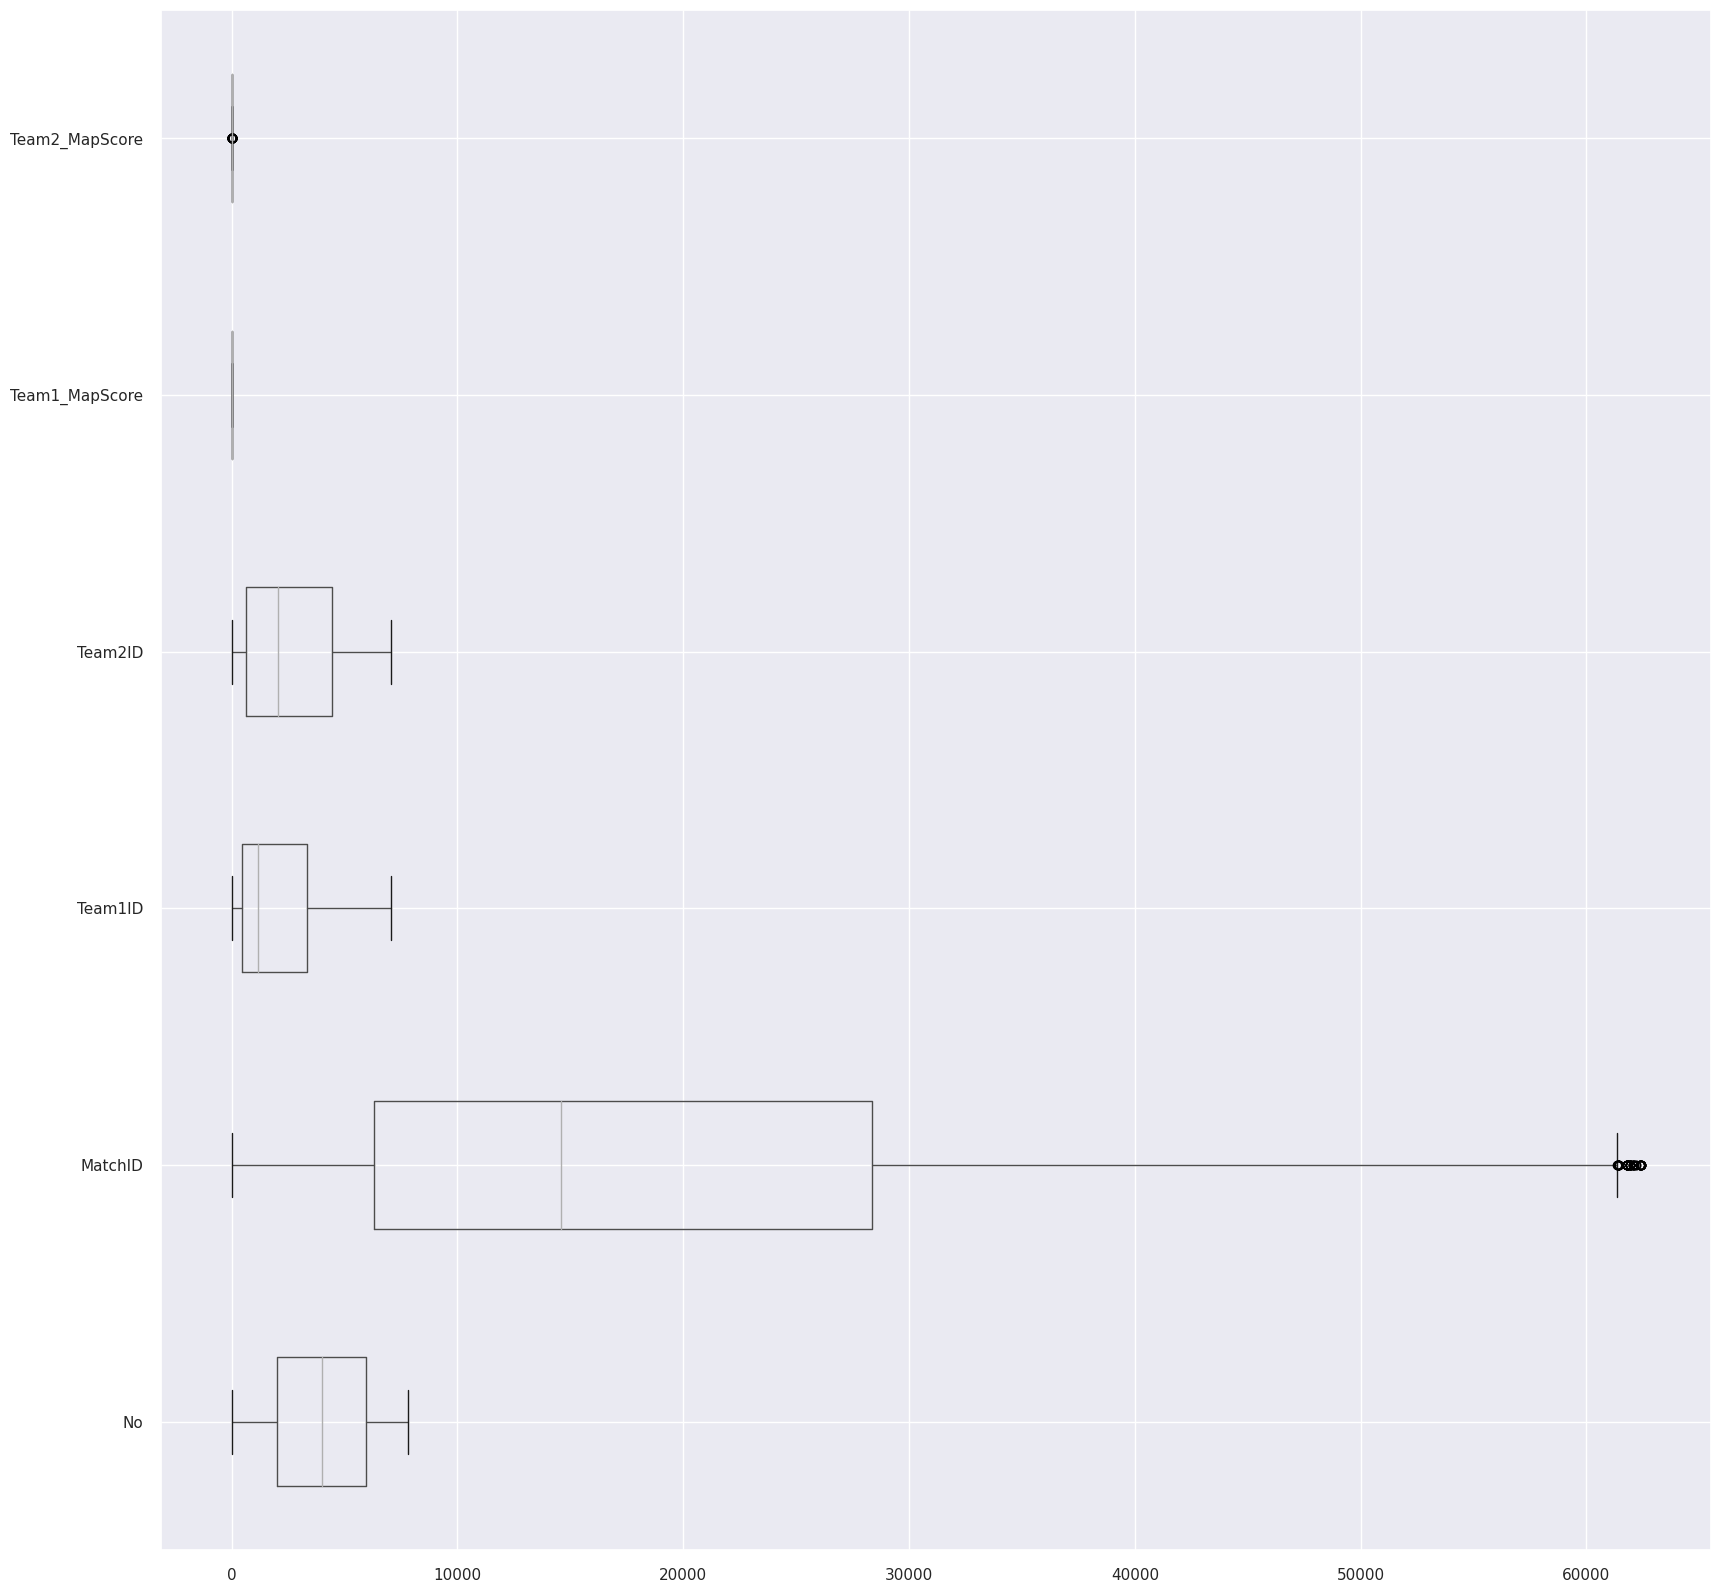

In [ ]:
matches.boxplot(vert=False,figsize=(20,20))

In [ ]:
check_outlier(matches)

Outlier pada tiap atribut:
                Total   Percent
No                  0  0.000000
MatchID            64  0.999844
Team1ID             0  0.000000
Team2ID             0  0.000000
Team1_MapScore      0  0.000000
Team2_MapScore     54  0.843618


<Axes: >

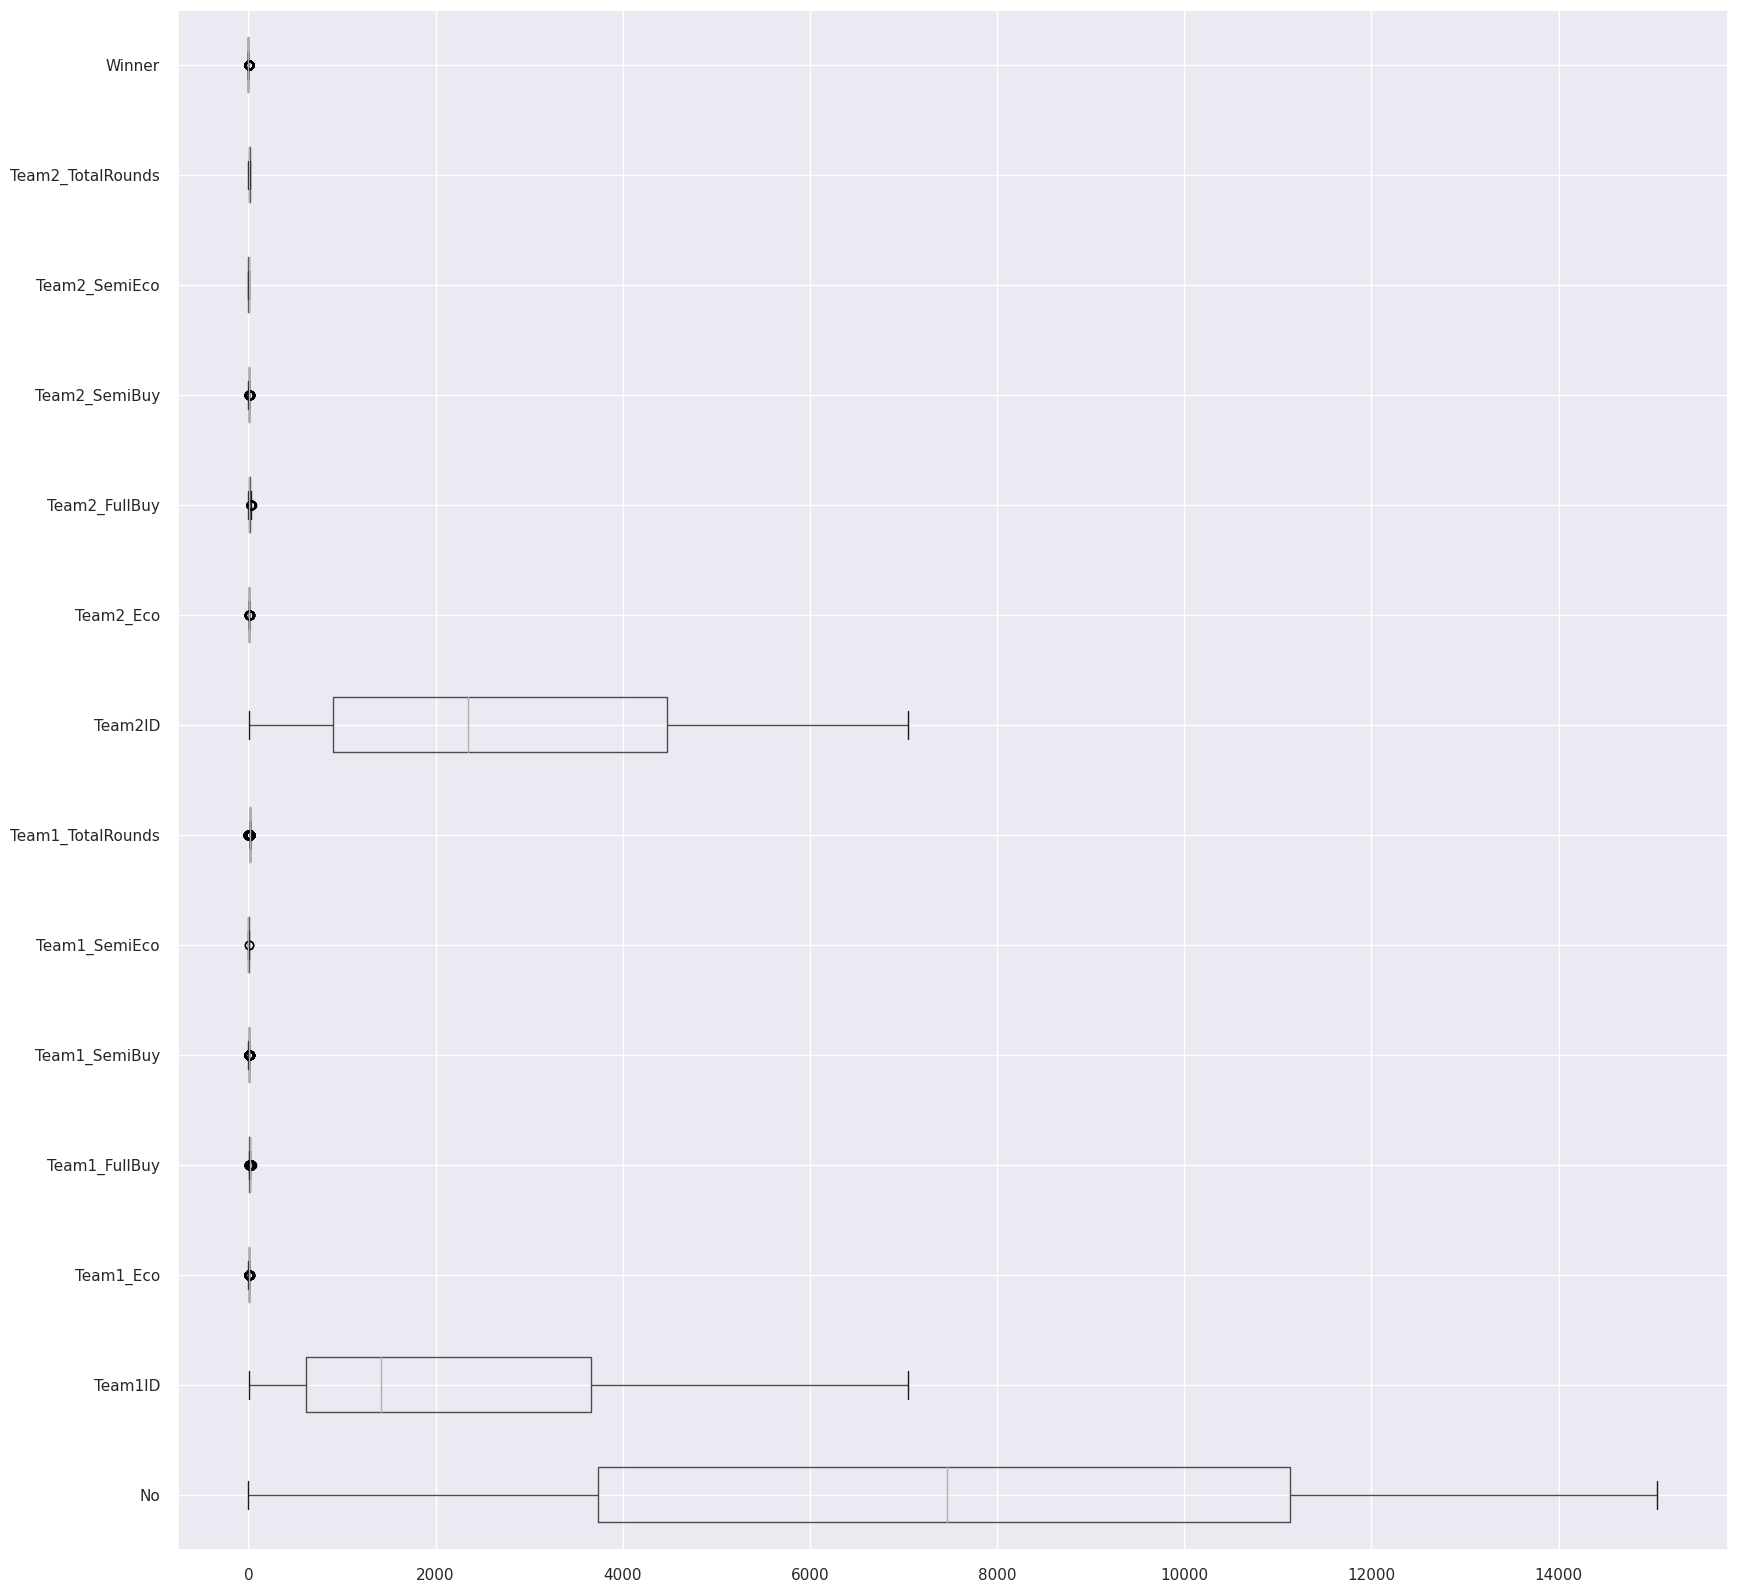

In [ ]:
columns_to_include = games.columns.difference(['MatchID', 'GameID'])

games[columns_to_include].boxplot(vert=False, figsize=(20, 20))

In [ ]:
check_outlier(games)

Outlier pada tiap atribut:
                   Total    Percent
GameID                 0   0.000000
Map                    0   0.000000
MatchID              142   1.190576
No                     0   0.000000
Team1ID                0   0.000000
Team1_Eco            196   1.643330
Team1_FullBuy        256   2.146391
Team1_SemiBuy        258   2.163159
Team1_SemiEco          2   0.016769
Team1_TotalRounds   3455  28.967888
Team2ID                0   0.000000
Team2_Eco             38   0.318605
Team2_FullBuy         77   0.645594
Team2_SemiBuy         55   0.461139
Team2_SemiEco          0   0.000000
Team2_TotalRounds      0   0.000000
Winner              2762  23.157542


<ipython-input-497-dbd8a3b135b6>:14: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-497-dbd8a3b135b6>:15: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-497-dbd8a3b135b6>:23: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


In [ ]:
# Karena outliernya tinggi jumlahnya, kolom Team1_TotalRounds dan Team2_TotalRounds
# perlu dihapus dan secara logika punya korelasi dengan Winner
games.drop(['Team1_TotalRounds','Team2_TotalRounds'], axis=1, inplace=True)
games_test.drop(['Team1_TotalRounds','Team2_TotalRounds'], axis=1, inplace=True)

<Axes: >

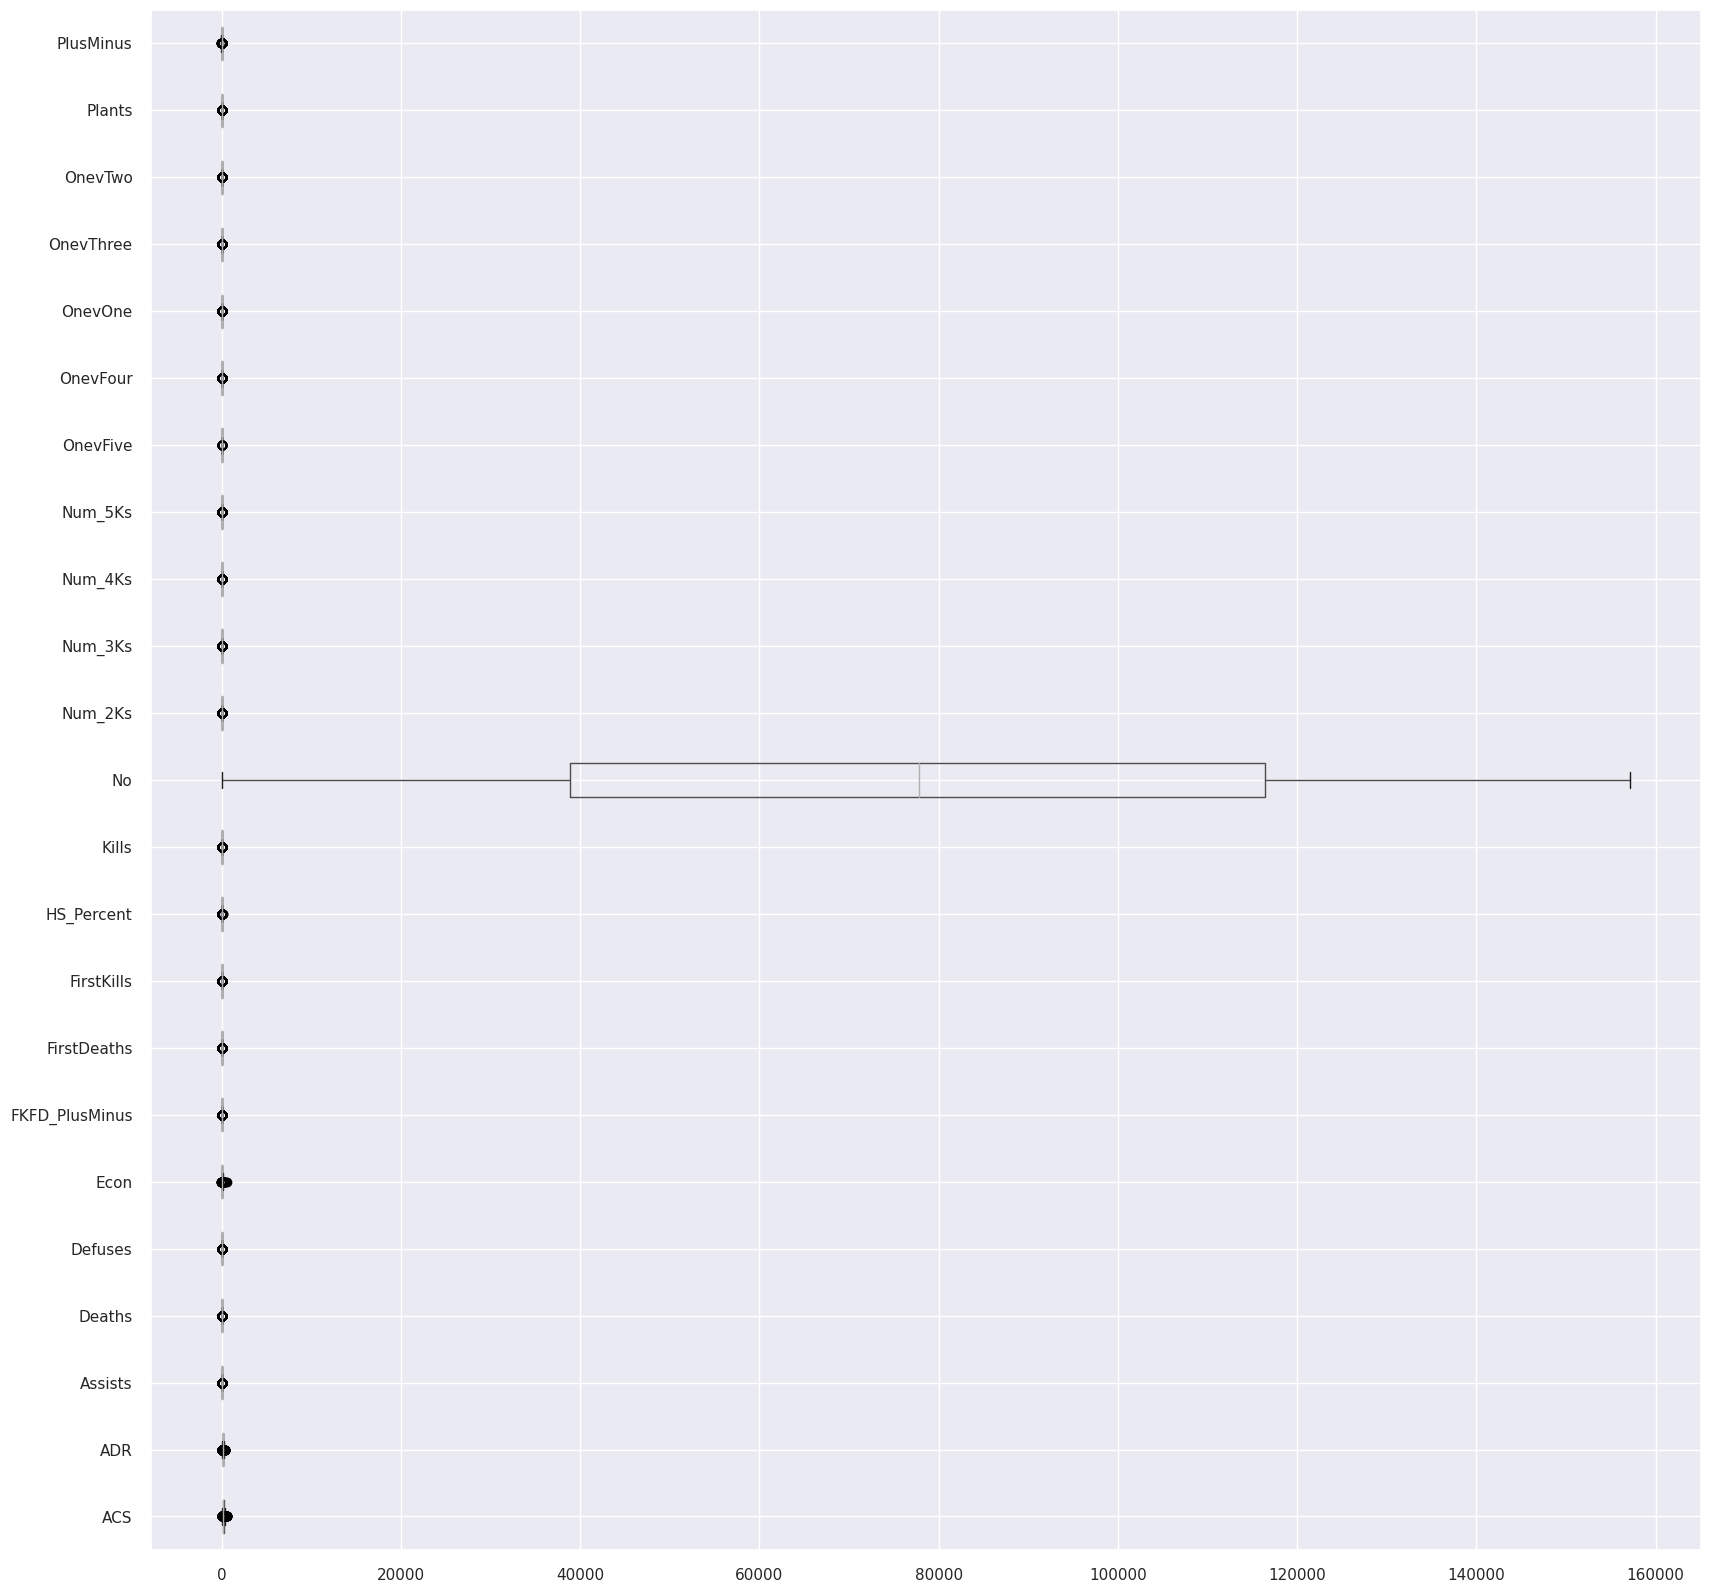

In [ ]:
columns_to_include = scores.columns.difference(['GameID', 'PlayerID'])

scores[columns_to_include].boxplot(vert=False, figsize=(20, 20))

In [ ]:
check_outlier(scores)

<ipython-input-497-dbd8a3b135b6>:14: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-497-dbd8a3b135b6>:15: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-497-dbd8a3b135b6>:23: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


Outlier pada tiap atribut:
                Total    Percent
ACS              1593   1.279909
ADR              1848   1.484791
Agent               0   0.000000
Assists          1773   1.424531
Deaths           1926   1.547460
Defuses          1380   1.108772
Econ             8439   6.780383
FKFD_PlusMinus   4810   3.864633
FirstDeaths      1539   1.236522
FirstKills       2531   2.033552
GameID              0   0.000000
HS_Percent       1488   1.195546
Kills            1356   1.089489
No                  0   0.000000
Num_2Ks           195   0.156674
Num_3Ks          6590   5.294789
Num_4Ks         18201  14.623741
Num_5Ks          2407   1.933924
OnevFive           63   0.050618
OnevFour          571   0.458775
OnevOne         21465  17.246228
OnevThree        3085   2.478668
OnevTwo         11376   9.140139
Plants           3732   2.998506
PlayerID         7149   5.743922
PlusMinus         500   0.401729


Tidak perlu di-handle karena field-field diatas terutama dengan percentage tinggi sangatlah mendefinisikan baik itu Agent maupun ACS yang ingin di prediksi. Sebagai contoh Num_4Ks berarti jumlah multikill (4) dalam suatu game. Hal ini cukup berdampak terhadap ACS suatu player serta agent yang digunakan. Tentu saja faktor-faktor seperti musuh dengan economy yang rendah dan lainnya perlu dikonsiderasi untuk menganalisa multikill. Namun secara general, atribut-atribut diatas cukuplah penting dalam menentukan agent dan ACS yang ditentukan.

In [ ]:
print("----Informasi Baris dan Kolom (Matches)----")
print("Baris : ", matches.shape[0])
print("Kolom : ", matches.shape[1])

----Informasi Baris dan Kolom (Matches)----
Baris :  6401
Kolom :  6


In [ ]:
print("----Informasi Baris dan Kolom (Games)----")
print("Baris : ", games.shape[0])
print("Kolom : ", games.shape[1])

----Informasi Baris dan Kolom (Games)----
Baris :  11927
Kolom :  15


In [ ]:
print("----Informasi Baris dan Kolom (Scores)----")
print("Baris : ", scores.shape[0])
print("Kolom : ", scores.shape[1])

----Informasi Baris dan Kolom (Scores)----
Baris :  124462
Kolom :  26


In [ ]:
print("----Informasi Kolom pada Matches----")
print("Kolom : ", list(matches.columns))

----Informasi Kolom pada Matches----
Kolom :  ['No', 'MatchID', 'Team1ID', 'Team2ID', 'Team1_MapScore', 'Team2_MapScore']


In [ ]:
print("----Informasi Kolom pada Games----")
print("Kolom : ", list(games.columns))

----Informasi Kolom pada Games----
Kolom :  ['No', 'GameID', 'MatchID', 'Map', 'Team1ID', 'Team2ID', 'Winner', 'Team1_Eco', 'Team1_SemiEco', 'Team1_SemiBuy', 'Team1_FullBuy', 'Team2_Eco', 'Team2_SemiEco', 'Team2_SemiBuy', 'Team2_FullBuy']


In [ ]:
print("----Informasi Kolom pada Scores----")
print("Kolom : ", list(scores.columns))

----Informasi Kolom pada Scores----
Kolom :  ['No', 'GameID', 'PlayerID', 'Agent', 'ACS', 'Kills', 'Deaths', 'Assists', 'PlusMinus', 'ADR', 'HS_Percent', 'FirstKills', 'FirstDeaths', 'FKFD_PlusMinus', 'Num_2Ks', 'Num_3Ks', 'Num_4Ks', 'Num_5Ks', 'OnevOne', 'OnevTwo', 'OnevThree', 'OnevFour', 'OnevFive', 'Econ', 'Plants', 'Defuses']


In [ ]:
# Mencari jumlah nilai unik pada kolom yang bertipe kategorik

for col in matches.select_dtypes(include=object).columns:
    print('No. of unique values in column '+col+':')
    print(matches[col].value_counts(),'\n')

In [ ]:
for col in games.select_dtypes(include=object).columns:
    print('No. of unique values in column '+ col+':')
    print(games[col].value_counts(),'\n')

No. of unique values in column Map:
Ascent      2909
Haven       2603
Bind        2466
Split       1780
Icebox      1564
Breeze       515
Fracture      90
Name: Map, dtype: int64 



In [ ]:
for col in scores.select_dtypes(include=object).columns:
    print('No. of unique values in column '+ col+':')
    print(scores[col].value_counts(),'\n')

No. of unique values in column Agent:
sova         18806
jett         18060
omen         12492
cypher       10879
raze         10484
killjoy       9247
sage          8323
astra         6565
viper         6148
breach        5800
skye          5274
reyna         5102
phoenix       3560
brimstone     2534
kayo           863
yoru           166
chamber        159
Name: Agent, dtype: int64 



### Feature Assessment and Visualization

In [ ]:
oe = OrdinalEncoder()

games[['Map']] = oe.fit_transform(games[['Map']])
games_test[['Map']] = oe.fit_transform(games_test[['Map']])

In [ ]:
# Hal-hal yang perlu di encode dengan dicitonary
agent_mapping = dict(zip(encoded_agent['Agent'], encoded_agent['Encode']))

# Tinggal di map.
scores['Agent'] = scores['Agent'].map(agent_mapping)

#### Find Correlation

In [ ]:
def showCorrelationMatrix(df, name):
  if name == 'Scores':
    plt.figure(figsize=(20,8))
  elif name == 'Merged':
    plt.figure(figsize=(32, 12))
  else:
    plt.figure(figsize=(10, 8))

  correlation_matrix = df.corr()

  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title(f"{name} Correlation")
  plt.show()

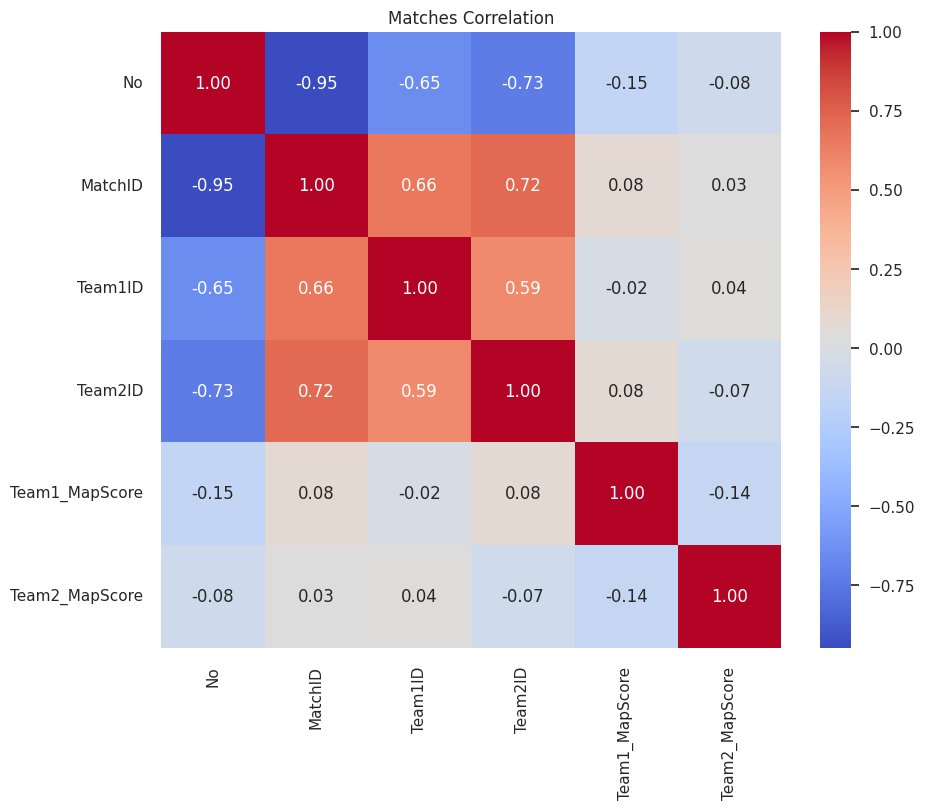

In [ ]:
showCorrelationMatrix(matches, "Matches")

> Tak perlu drop

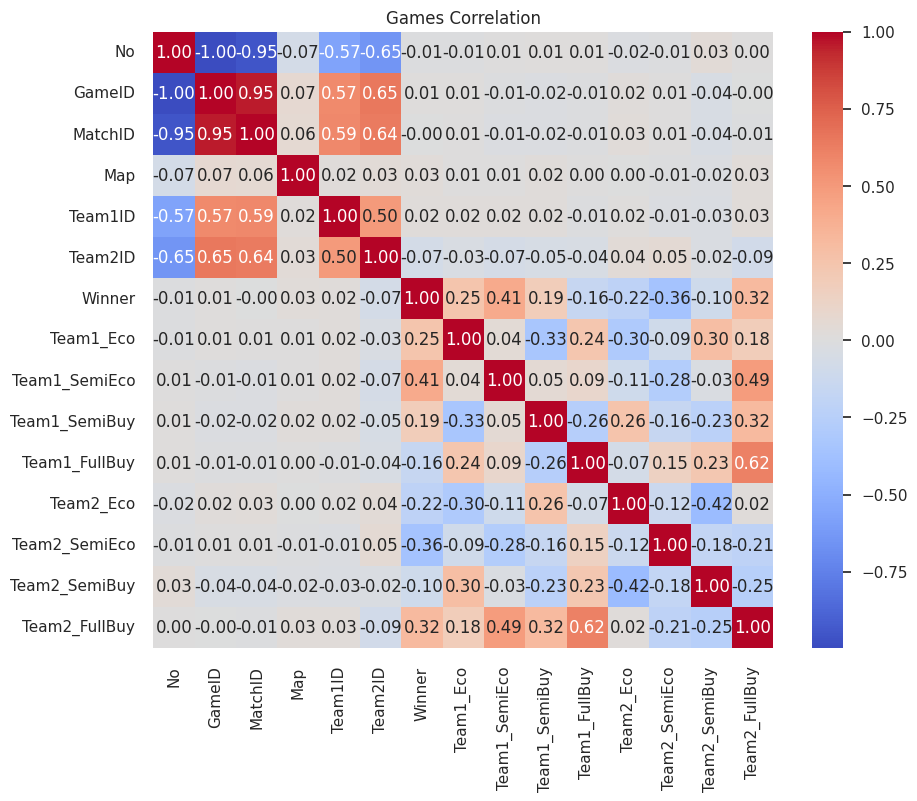

In [ ]:
showCorrelationMatrix(games, "Games")

In [ ]:
# Drop winner karna derived attr
games.drop(['Winner'], axis=1, inplace=True)
games_test.drop(['Winner'], axis=1, inplace=True)

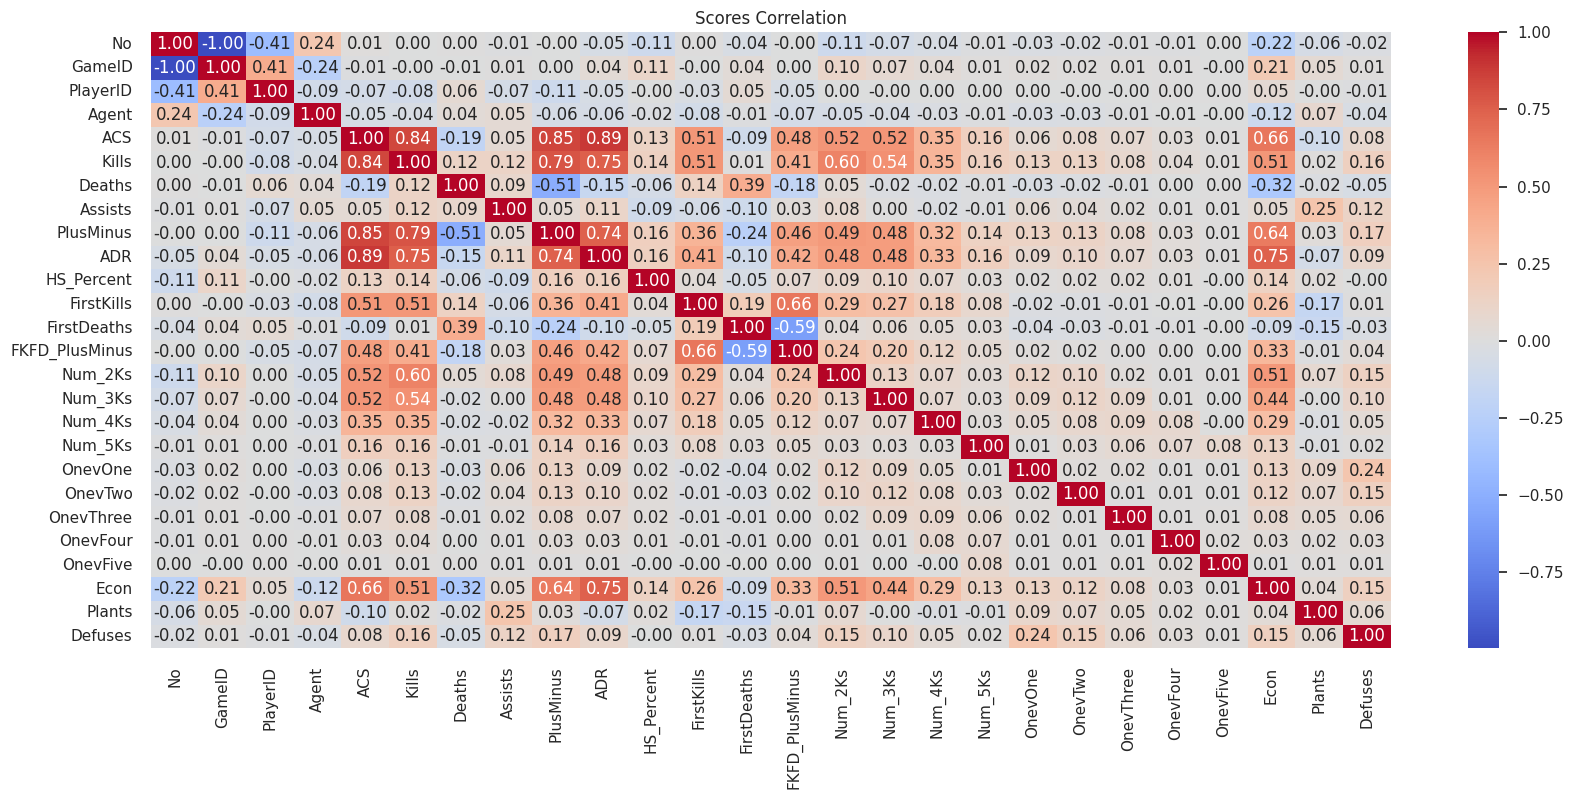

In [ ]:
showCorrelationMatrix(scores, "Scores")

In [ ]:
# https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/#:~:text=High%20degree%3A%20If%20the%20coefficient,to%20be%20a%20small%20correlation.
# Drop Kills, First Kills, ADR, PlusMinus, Econ (Economy), Num_2Ks, Num_3Ks
scores.drop(['FirstKills', 'ADR', 'PlusMinus', 'Econ', 'Num_2Ks', 'Num_3Ks'], axis=1, inplace=True)
scores_test.drop(['FirstKills', 'ADR', 'PlusMinus', 'Econ', 'Num_2Ks', 'Num_3Ks'], axis=1, inplace=True)

#### Choose training data

In [ ]:
# Gabungkan dataset berdasarkan MatchID atau GameID
merged_data = pd.merge(pd.merge(matches, games, on='MatchID'), scores, on='GameID')
merged_data_test = pd.merge(pd.merge(matches_test, games_test, on='MatchID'), scores_test, on='GameID')

In [ ]:
corr_matrix = merged_data.corr()
print(corr_matrix['Agent'].sort_values(ascending=False))

Agent             1.000000
No_y              0.220959
No                0.220954
No_x              0.219741
Plants            0.094946
Assists           0.054278
Map               0.053014
Deaths            0.038783
Team2_SemiBuy     0.008345
Team1_SemiBuy     0.003533
Team1_SemiEco     0.002697
Team1_FullBuy     0.002535
Team2_FullBuy     0.001541
Team2_MapScore   -0.000202
OnevFive         -0.001268
FirstDeaths      -0.001468
Team2_SemiEco    -0.002762
OnevFour         -0.004055
Team1_Eco        -0.005485
OnevThree        -0.007257
Team2_Eco        -0.008391
Num_5Ks          -0.009012
Team1_MapScore   -0.013463
Num_4Ks          -0.019000
HS_Percent       -0.019216
OnevTwo          -0.019598
OnevOne          -0.021734
Defuses          -0.025146
Kills            -0.039110
ACS              -0.049700
FKFD_PlusMinus   -0.068214
PlayerID         -0.075782
Team1ID_y        -0.122486
Team1ID_x        -0.122486
Team2ID_y        -0.146888
Team2ID_x        -0.146888
MatchID          -0.215942
G

In [ ]:
merged_data.drop(['No', 'MatchID', 'GameID', 'Team1ID_x', 'Team2ID_x'], axis=1, inplace=True)
merged_data_test.drop(['MatchID', 'GameID', 'Team1ID_x', 'Team2ID_x'], axis=1, inplace=True)

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118494 entries, 0 to 118493
Data columns (total 33 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   No_x            118494 non-null  int64  
 1   Team1_MapScore  118494 non-null  int64  
 2   Team2_MapScore  118494 non-null  int64  
 3   No_y            118494 non-null  int64  
 4   Map             118494 non-null  float64
 5   Team1ID_y       118494 non-null  int64  
 6   Team2ID_y       118494 non-null  int64  
 7   Team1_Eco       118494 non-null  float64
 8   Team1_SemiEco   118494 non-null  float64
 9   Team1_SemiBuy   118494 non-null  float64
 10  Team1_FullBuy   118494 non-null  float64
 11  Team2_Eco       118494 non-null  float64
 12  Team2_SemiEco   118494 non-null  float64
 13  Team2_SemiBuy   118494 non-null  float64
 14  Team2_FullBuy   118494 non-null  float64
 15  PlayerID        118494 non-null  float64
 16  Agent           118494 non-null  int64  
 17  ACS       

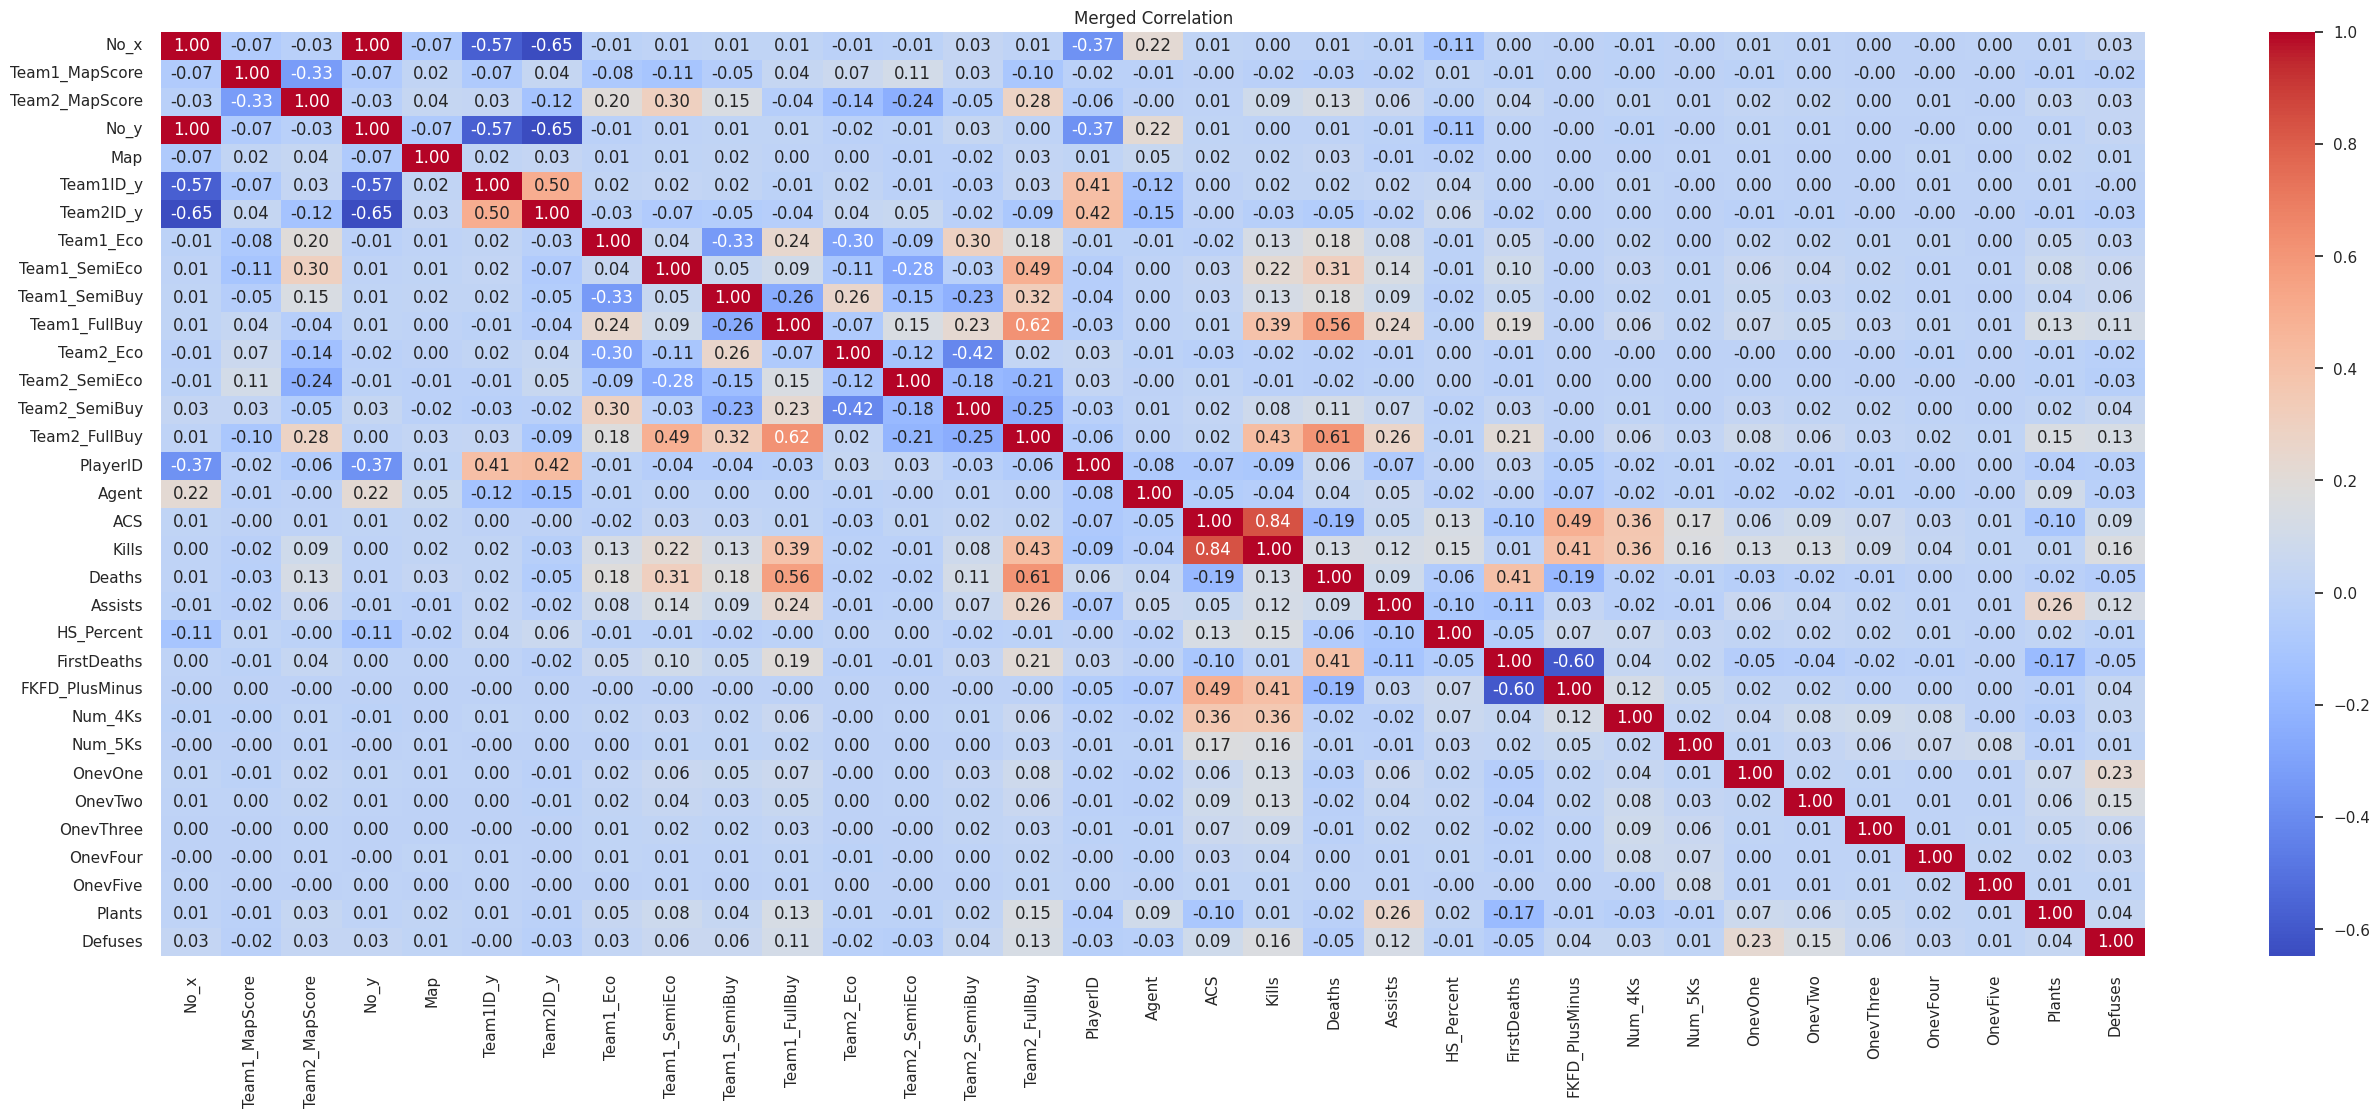

In [ ]:
showCorrelationMatrix(merged_data, "Merged")

In [ ]:
corr_matrix = merged_data.corr()
print(corr_matrix['Agent'].sort_values(ascending=False))

Agent             1.000000
No_y              0.220959
No_x              0.219741
Plants            0.094946
Assists           0.054278
Map               0.053014
Deaths            0.038783
Team2_SemiBuy     0.008345
Team1_SemiBuy     0.003533
Team1_SemiEco     0.002697
Team1_FullBuy     0.002535
Team2_FullBuy     0.001541
Team2_MapScore   -0.000202
OnevFive         -0.001268
FirstDeaths      -0.001468
Team2_SemiEco    -0.002762
OnevFour         -0.004055
Team1_Eco        -0.005485
OnevThree        -0.007257
Team2_Eco        -0.008391
Num_5Ks          -0.009012
Team1_MapScore   -0.013463
Num_4Ks          -0.019000
HS_Percent       -0.019216
OnevTwo          -0.019598
OnevOne          -0.021734
Defuses          -0.025146
Kills            -0.039110
ACS              -0.049700
FKFD_PlusMinus   -0.068214
PlayerID         -0.075782
Team1ID_y        -0.122486
Team2ID_y        -0.146888
Name: Agent, dtype: float64


In [ ]:
merged_data.drop(['Team1_SemiBuy', 'Team2_Eco', 'Team2_FullBuy', 'Team2_SemiBuy', 'Team2_SemiEco'], axis=1, inplace=True)
merged_data_test.drop(['Team1_SemiBuy', 'Team2_Eco', 'Team2_FullBuy', 'Team2_SemiBuy', 'Team2_SemiEco'], axis=1, inplace=True)

In [ ]:
merged_data_test_copy = merged_data_test.copy()
merged_data_test.drop(['No'], axis=1, inplace=True)

In [ ]:
columns_to_exclude = ['Agent', 'ACS']

selected_features = [col for col in merged_data.columns if col not in columns_to_exclude]

In [ ]:
# Pisahkan data menjadi data latih dan data uji
X = merged_data[selected_features]
y = merged_data['Agent']

In [ ]:
tomek = TomekLinks()
X, y = tomek.fit_resample(X, y)

#### Train

In [ ]:
def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Menggunakan quantile transformer untuk mengurangi pengaruh outlier
scaler = QuantileTransformer()
X_train[[col for col in X_train.columns]] = scaler.fit_transform(X_train[[col for col in X_train.columns]])
X_test[[col for col in X_test.columns]]  = scaler.transform(X_test[[col for col in X_test.columns]])
merged_data_test[[col for col in merged_data_test.columns]] = scaler.transform(merged_data_test[[col for col in merged_data_test.columns]])

In [ ]:
model = AdaBoostClassifier(
    learning_rate=0.1,
    n_estimators=500
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_classifier_performance(y_pred, y_test)
kaggle_pred_ada = model.predict(merged_data_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.37      0.79      0.51      2409
           1       0.30      0.74      0.43      2236
           2       0.25      0.04      0.07       787
           3       0.00      0.00      0.00        66
           4       0.26      0.03      0.06       976
           5       0.00      0.00      0.00       511
           6       0.16      0.01      0.02      1047
           7       0.09      0.01      0.02       528
           8       0.41      0.09      0.15       692
           9       0.00      0.00      0.00       496
          10       0.23      0.44      0.30        27
          11       0.37      0.13      0.19       975
          12       0.00      0.00      0.00       578
          13       0.31      0.18      0.22      1434
          14       0.00      0.00      0.00       152
          15       0.00      0.00      0.00       278
          16       0.00      0

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_classifier_performance(y_pred, y_test)
kaggle_pred_rf = model.predict(merged_data_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.46      0.79      0.58      2409
           1       0.37      0.70      0.48      2236
           2       0.26      0.18      0.22       787
           3       0.00      0.00      0.00        66
           4       0.29      0.14      0.19       976
           5       0.21      0.04      0.07       511
           6       0.25      0.15      0.18      1047
           7       0.21      0.03      0.05       528
           8       0.55      0.31      0.39       692
           9       0.30      0.01      0.03       496
          10       0.33      0.04      0.07        27
          11       0.38      0.27      0.31       975
          12       0.45      0.21      0.28       578
          13       0.34      0.39      0.36      1434
          14       0.00      0.00      0.00       152
          15       0.09      0.00      0.01       278
          16       0.00      0

In [ ]:
### Hasil parameter tuning

model = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=8,
 min_child_weight=6,
 gamma=0.005,
 subsample=0.9,
 colsample_bytree=0.8,
 reg_alpha=0.01,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_classifier_performance(y_pred, y_test)
kaggle_pred_xbg = model.predict(merged_data_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:37:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.60      0.77      0.67      2409
           1       0.48      0.70      0.57      2236
           2       0.50      0.45      0.47       787
           3       0.30      0.12      0.17        66
           4       0.46      0.38      0.42       976
           5       0.40      0.22      0.29       511
           6       0.39      0.34      0.36      1047
           7       0.38      0.25      0.30       528
           8       0.56      0.41      0.47       692
           9       0.48      0.16      0.24       496
          10       0.33      0.26      0.29        27
          11       0.46      0.47      0.46       975
          12       0.56      0.36      0.44       578
          13       0.44      0.48      0.46      1434
          14       0.27      0.06      0.10       152
          15       0.30      0.12      0.17       278
          16       0.00      0

In [ ]:
submit_classification_ada = pd.DataFrame({
    'No': merged_data_test_copy['No'], 'Agent': kaggle_pred_ada
})

submit_classification_ada.to_csv('submit_classification_ada.csv', columns=['No', 'Agent'], index=False)

In [ ]:
submit_classification_rf = pd.DataFrame({
    'No': merged_data_test_copy['No'], 'Agent': kaggle_pred_rf
})

submit_classification_rf.to_csv('submit_classification_rf.csv', columns=['No', 'Agent'], index=False)

In [ ]:
submit_classification_xbg = pd.DataFrame({
    'No': merged_data_test_copy['No'], 'Agent': kaggle_pred_xbg
})

submit_classification_xbg.to_csv('submit_classification_xbg.csv', columns=['No', 'Agent'], index=False)

# Regression

### Inisiasi Dataset

In [ ]:
games = pd.read_csv(FILES_ROOT_PATH + 'games.csv')
matches = pd.read_csv(FILES_ROOT_PATH + 'matches.csv')
scores = pd.read_csv(FILES_ROOT_PATH + 'scores.csv')
matches_test = pd.read_csv(FILES_ROOT_PATH +'matches_test.csv')
games_test = pd.read_csv(FILES_ROOT_PATH+'games_test.csv')
scores_test = pd.read_csv(FILES_ROOT_PATH+'scores_test.csv')
encoded_agent = pd.read_csv(FILES_ROOT_PATH + 'agent_encode.csv')
matches_test_copy = matches_test.copy()

### Preprocessing

In [ ]:
# Drop kolom kolom yang kurang relevan.
matches.drop(['No', 'Date', 'Patch', 'EventID', 'EventName', 'EventStage', 'Team1', 'Team2', 'Team1ID', 'Team2ID'],axis=1,inplace=True)
matches_test.drop(['No', 'Date', 'Patch', 'EventID', 'EventName', 'EventStage', 'Team1', 'Team2', 'Team1ID', 'Team2ID'],axis=1,inplace=True)
games.drop(['No', 'Team1', 'Team2'],axis=1,inplace=True)
games_test.drop(['No', 'Team1', 'Team2'],axis=1,inplace=True)
scores.drop(['No', 'PlayerName'], axis=1, inplace=True)
scores_test.drop(['No', 'PlayerName'], axis=1, inplace=True)

In [ ]:
# Remove baris yang penting
scores = remove_null_row_if_column(scores, 'PlayerID')
scores = remove_null_row_if_column(scores, 'ACS')
scores = remove_null_row_if_column(scores, 'Agent')
# Isi 'ADR' dan 'HS_Percent' dengan median
fill_with_median(scores, ['ADR', 'HS_Percent'])
# Isi 'FirstDeaths' dan 'FKFD_PlusMinus' dengan modus
fill_with_mode(scores, ['FirstDeaths','FKFD_PlusMinus'])
# Anggap saja semua array dibawah memang seharusnya 0 karena tidak semua player bisa clutch, multikill, dkk
fill_with_0(scores, ['Plants', 'Num_2Ks', 'Num_3Ks', 'Num_4Ks', 'Num_5Ks', 'OnevOne', 'OnevTwo', 'OnevThree', 'OnevFour', 'OnevFive', 'Econ', 'Plants', 'Defuses'])
# Karena KAST_Percent 97% maka dihapus saja
scores.drop(['KAST_Percent'], axis=1, inplace=True)
scores_test.drop(['KAST_Percent'], axis=1, inplace=True)

<ipython-input-497-dbd8a3b135b6>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled_selective[col] = df_filled_selective[col].fillna(df_filled_selective[col].median())
<ipython-input-497-dbd8a3b135b6>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled_selective[col] = df_filled_selective[col].fillna(df_filled_selective[col].median())
<ipython-input-497-dbd8a3b135b6>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

> Bedanya dengan klasifikasi hanya tidak meremove Team Abbreviation

In [ ]:
# Group by GameID dan TeamAbbreviation, lalu hitung rata-rata semua kolom
average_scores = scores.groupby(['GameID', 'TeamAbbreviation'], sort=False).mean().reset_index()
average_scores_test = scores_test.groupby(['GameID', 'TeamAbbreviation'], sort=False).mean().reset_index()
# Pisahkan data menjadi dua dataframe berdasarkan indeks ganjil dan genap
team_1 = average_scores[average_scores.index % 2 == 0].reset_index(drop=True)
team_2 = average_scores[average_scores.index % 2 != 0].reset_index(drop=True)
team_1_test = average_scores_test[average_scores_test.index % 2 == 0].reset_index(drop=True)
team_2_test = average_scores_test[average_scores_test.index % 2 != 0].reset_index(drop=True)
# Ganti nama kolom
team_1.columns = [str(col) + '_1' if col != 'GameID' else col for col in team_1.columns]
team_2.columns = [str(col) + '_2' if col != 'GameID' else col for col in team_2.columns]

team_1_test.columns = [str(col) + '_1' if col != 'GameID' else col for col in team_1_test.columns]
team_2_test.columns = [str(col) + '_2' if col != 'GameID' else col for col in team_2_test.columns]
# Gabungkan kedua dataframe
combined_scores = pd.merge(team_1, team_2, on='GameID')
combined_scores_test = pd.merge(team_1_test, team_2_test, on='GameID')
combined_scores.to_csv('test.csv')

<ipython-input-555-0abef4cba5a8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores = scores.groupby(['GameID', 'TeamAbbreviation'], sort=False).mean().reset_index()


In [ ]:
check_null(combined_scores)

Tidak ditemukan missing value pada dataset


In [ ]:
# Gabungkan dataframe berdasarkan GameID
merged_data = pd.merge(games, combined_scores, on='GameID')
merged_data_test = pd.merge(games_test, combined_scores_test, on='GameID')

In [ ]:
check_null(merged_data)

               Total   Percent
Team2_SemiEco    581  0.047228
Team1_SemiBuy    581  0.047228
Team1_SemiEco    581  0.047228
Team1_Eco        581  0.047228
Team2_SemiBuy    581  0.047228
Team2_FullBuy    581  0.047228
Team2_Eco        581  0.047228
Team1_FullBuy    581  0.047228


In [ ]:
merged_data = pd.merge(matches, merged_data, on='MatchID')
merged_data_test = pd.merge(matches_test, merged_data_test, on='MatchID')

# Group by MatchID dan hitung rata-rata skor ACS
merged_data = merged_data.groupby('MatchID', sort=False).mean().reset_index()
merged_data_test = merged_data_test.groupby('MatchID', sort=False).mean().reset_index()

<ipython-input-559-5bccf1d0ec34>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_data = merged_data.groupby('MatchID', sort=False).mean().reset_index()
<ipython-input-559-5bccf1d0ec34>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_data_test = merged_data_test.groupby('MatchID', sort=False).mean().reset_index()


In [ ]:
merged_data

MatchID  Team1_MapScore  Team2_MapScore   GameID  Team1ID  Team2ID  \
0       62393             2.0             1.0  60895.0   6903.0   6020.0   
1       62403             2.0             0.0  60924.5   7046.0   7047.0   
2       62391             2.0             1.0  60889.0   6461.0   6903.0   
3       62396             2.0             0.0  60903.5   6164.0   7043.0   
4       62402             2.0             0.0  60921.5   7047.0   3545.0   
...       ...             ...             ...      ...      ...      ...   
5914      276             1.0             0.0    490.0     21.0    129.0   
5915      282             1.0             0.0    496.0     74.0    134.0   
5916      178             1.0             2.0    274.0     86.0     85.0   
5917      175             2.0             1.0    265.0     79.0     82.0   
5918      160             1.0             2.0    220.0     83.0     82.0   

        Winner  Team1_Eco  Team1_SemiEco  Team1_SemiBuy  ...  Num_4Ks_2  \
0     1.333333   2.333333       1.666667       5.000000  ...   0.266667   
1     1.000000   3.000000       2.000000       3.500000  ...   0.000000   
2     1.333333   2.666667       1.000000       3.333333  ...   0.200000   
3     1.000000   2.000000       0.000000       4.500000  ...   0.000000   
4     1.000000   3.000000       1.000000       4.000000  ...   0.000000   
...        ...        ...            ...            ...  ...        ...   
5914  1.000000        NaN            NaN            NaN  ...   0.000000   
5915  1.000000        NaN            NaN            NaN  ...   0.000000   
5916  1.666667        NaN            NaN            NaN  ...   0.000000   
5917  1.333333        NaN            NaN            NaN  ...   0.000000   
5918  1.666667        NaN            NaN            NaN  ...   0.000000   

      Num_5Ks_2  OnevOne_2  OnevTwo_2  OnevThree_2  OnevFour_2  OnevFive_2  \
0           0.0   0.066667   0.133333          0.0         0.0         0.0   
1           0.0   0.200000   0.100000          0.0         0.0         0.0   
2           0.0   0.200000   0.133333          0.0         0.0         0.0   
3           0.0   0.300000   0.000000          0.0         0.0         0.0   
4           0.0   0.000000   0.000000          0.1         0.0         0.0   
...         ...        ...        ...          ...         ...         ...   
5914        0.0   0.000000   0.000000          0.0         0.0         0.0   
5915        0.0   0.000000   0.000000          0.0         0.0         0.0   
5916        0.0   0.000000   0.000000          0.0         0.0         0.0   
5917        0.0   0.000000   0.000000          0.0         0.0         0.0   
5918        0.0   0.000000   0.000000          0.0         0.0         0.0   

         Econ_2  Plants_2  Defuses_2  
0     55.533333  1.533333   0.133333  
1     48.900000  1.500000   0.700000  
2     48.400000  1.133333   0.333333  
3     44.000000  0.600000   0.100000  
4     50.600000  1.900000   0.200000  
...         ...       ...        ...  
5914   0.000000  0.000000   0.000000  
5915   0.000000  0.000000   0.000000  
5916   0.000000  0.000000   0.000000  
5917   0.000000  0.000000   0.000000  
5918   0.000000  0.000000   0.000000  

[5919 rows x 63 columns]

In [ ]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5919 entries, 0 to 5918
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MatchID            5919 non-null   int64  
 1   Team1_MapScore     5919 non-null   float64
 2   Team2_MapScore     5919 non-null   float64
 3   GameID             5919 non-null   float64
 4   Team1ID            5919 non-null   float64
 5   Team2ID            5919 non-null   float64
 6   Winner             5919 non-null   float64
 7   Team1_Eco          5626 non-null   float64
 8   Team1_SemiEco      5626 non-null   float64
 9   Team1_SemiBuy      5626 non-null   float64
 10  Team1_FullBuy      5626 non-null   float64
 11  Team1_TotalRounds  5919 non-null   float64
 12  Team2_Eco          5626 non-null   float64
 13  Team2_SemiEco      5626 non-null   float64
 14  Team2_SemiBuy      5626 non-null   float64
 15  Team2_FullBuy      5626 non-null   float64
 16  Team2_TotalRounds  5919 

### Preprocessing lagi untuk merged data

In [ ]:
check_null(merged_data)

               Total   Percent
Team1_SemiEco    293  0.049502
Team1_SemiBuy    293  0.049502
Team1_FullBuy    293  0.049502
Team2_Eco        293  0.049502
Team2_SemiEco    293  0.049502
Team2_FullBuy    293  0.049502
Team1_Eco        293  0.049502
Team2_SemiBuy    293  0.049502


In [ ]:
# Mendapatkan match id
match_ids = matches['MatchID'].values
match_test_ids = matches_test['MatchID'].values

In [ ]:
# Mengatur baris supaya sesuai dengan MatchID
merged_data = merged_data.set_index('MatchID')
merged_data = merged_data.reindex(match_ids)

In [ ]:
merged_data_test = merged_data_test.set_index('MatchID')
merged_data_test = merged_data_test.reindex(match_test_ids)

In [ ]:
# Hapus baris dengan nilai NaN
merged_data = merged_data.dropna()
merged_data_test = merged_data_test.dropna()

In [ ]:
check_null(merged_data)

Tidak ditemukan missing value pada dataset


### View datasetnya

In [ ]:
print("----Informasi Baris dan Kolom (Merged Data)----")
print("Baris : ", merged_data.shape[0])
print("Kolom : ", merged_data.shape[1])

----Informasi Baris dan Kolom (Merged Data)----
Baris :  5626
Kolom :  62


### Feature assesment

In [ ]:
def showCorrelationMatrix(df, name):
  if name == 'Scores':
    plt.figure(figsize=(20,8))
  elif name == 'Merged':
    plt.figure(figsize=(54, 24))
  else:
    plt.figure(figsize=(10, 8))

  correlation_matrix = df.corr()

  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title(f"{name} Correlation")
  plt.show()

In [ ]:
# Remove yang diminta dosen
merged_data.drop(['Kills_1', 'Kills_2', 'Deaths_1', 'Deaths_2', 'Assists_1', 'Assists_2', 'PlusMinus_1', 'PlusMinus_2', 'ADR_1', 'ADR_2'],axis=1,inplace=True)
merged_data_test.drop(['Kills_1', 'Kills_2', 'Deaths_1', 'Deaths_2', 'Assists_1', 'Assists_2', 'PlusMinus_1', 'PlusMinus_2', 'ADR_1', 'ADR_2'],axis=1,inplace=True)

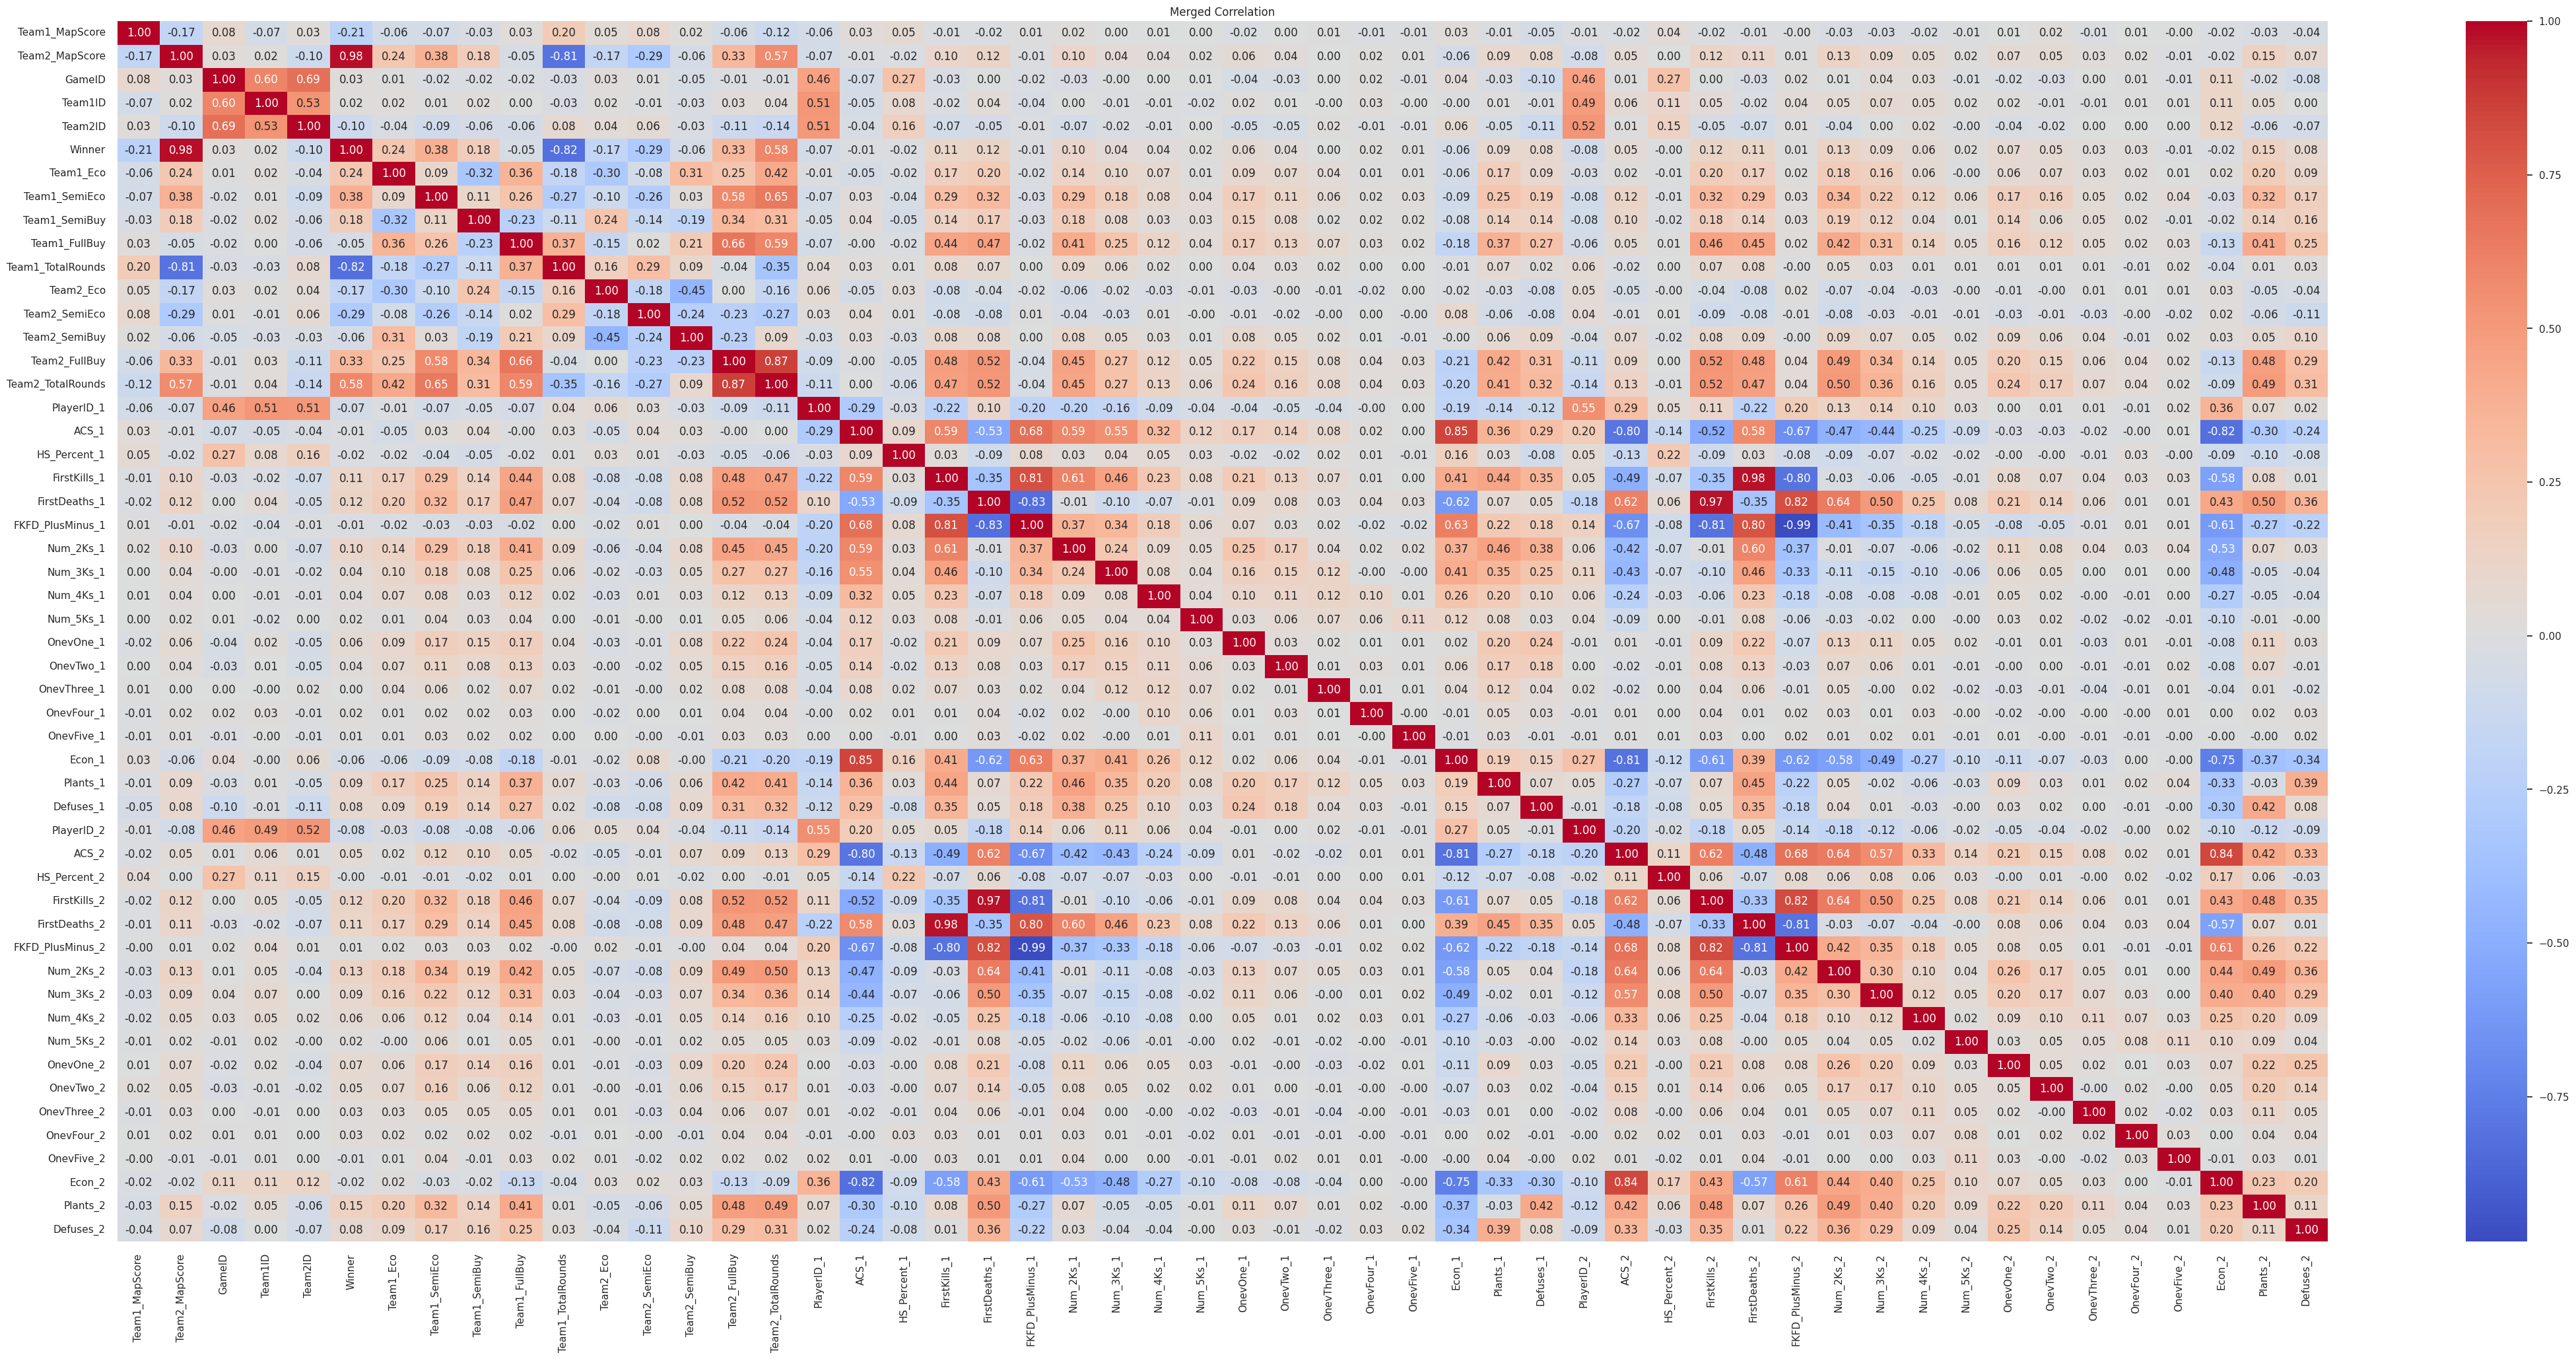

In [ ]:
showCorrelationMatrix(merged_data, 'Merged')

### Persiapan training

In [ ]:
X_raw = merged_data.drop(["ACS_1", "ACS_2"],axis=1)
y     = merged_data[['ACS_1', 'ACS_2']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size = 0.2, random_state = 123)

### Training

In [ ]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [ ]:
multi_output_model_cat = MultiOutputRegressor(CatBoostRegressor())
multi_output_model_cat.fit(X_train, y_train)
y_pred_cat = multi_output_model_cat.predict(X_test)

Learning rate set to 0.051926
0:	learn: 24.5934695	total: 7ms	remaining: 7s
1:	learn: 23.6746431	total: 16.4ms	remaining: 8.18s
2:	learn: 22.8180783	total: 26.2ms	remaining: 8.72s
3:	learn: 21.9921341	total: 34ms	remaining: 8.46s
4:	learn: 21.1665773	total: 40.1ms	remaining: 7.98s
5:	learn: 20.4246038	total: 45.6ms	remaining: 7.55s
6:	learn: 19.7020153	total: 52.7ms	remaining: 7.48s
7:	learn: 19.0228822	total: 57.5ms	remaining: 7.13s
8:	learn: 18.3915794	total: 63.2ms	remaining: 6.95s
9:	learn: 17.7855274	total: 68.7ms	remaining: 6.8s
10:	learn: 17.2116385	total: 75.6ms	remaining: 6.79s
11:	learn: 16.6504986	total: 81.2ms	remaining: 6.69s
12:	learn: 16.1528519	total: 86.4ms	remaining: 6.56s
13:	learn: 15.6596312	total: 91.7ms	remaining: 6.46s
14:	learn: 15.1973310	total: 100ms	remaining: 6.6s
15:	learn: 14.7539766	total: 109ms	remaining: 6.68s
16:	learn: 14.3675537	total: 113ms	remaining: 6.55s
17:	learn: 13.9932759	total: 120ms	remaining: 6.52s
18:	learn: 13.6295688	total: 125ms	remai

In [ ]:
regression_metrics(y_pred_cat, y_test)

MAE: 4.889720450763418
MSE: 41.96045122666669
RMSE: 6.477688725669573
R_squared: 0.9385560899641865


In [ ]:
multi_output_model_hist = MultiOutputRegressor(HistGradientBoostingRegressor())
multi_output_model_hist.fit(X_train, y_train)
y_pred_hist = multi_output_model_hist.predict(X_test)

In [ ]:
regression_metrics(y_pred_hist, y_test)

MAE: 5.082206580252578
MSE: 46.751813391394975
RMSE: 6.837529772614886
R_squared: 0.931560935358497


In [ ]:
multi_output_model_lbgm = MultiOutputRegressor(LGBMRegressor())
multi_output_model_lbgm.fit(X_train, y_train)
y_pred_lbgm = multi_output_model_lbgm.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4211
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 50
[LightGBM] [Info] Start training from score 203.994196
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4211
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 50
[LightGBM] [Info] Start training from score 201.336128


In [ ]:
regression_metrics(y_pred_lbgm, y_test)

MAE: 5.1434913093711305
MSE: 47.202712961212924
RMSE: 6.870423055475763
R_squared: 0.9309031235335943


In [ ]:
ACS_pred_kaggle_cat = multi_output_model_cat.predict(merged_data_test)

ACS_pred_kaggle_cat = pd.DataFrame(ACS_pred_kaggle_cat, columns=['ACS_1', 'ACS_2'])

# Pisahkan ACS_pred_kaggle menjadi dua kolom
ACS_1_pred_kaggle_cat = ACS_pred_kaggle_cat['ACS_1']
ACS_2_pred_kaggle_cat = ACS_pred_kaggle_cat['ACS_2']

In [ ]:
ACS_pred_kaggle_hist = multi_output_model_hist.predict(merged_data_test)

ACS_pred_kaggle_hist = pd.DataFrame(ACS_pred_kaggle_hist, columns=['ACS_1', 'ACS_2'])

# Pisahkan ACS_pred_kaggle menjadi dua kolom
ACS_1_pred_kaggle_hist = ACS_pred_kaggle_hist['ACS_1']
ACS_2_pred_kaggle_hist = ACS_pred_kaggle_hist['ACS_2']

In [ ]:
ACS_pred_kaggle_lbgm = multi_output_model_lbgm.predict(merged_data_test)

ACS_pred_kaggle_lbgm = pd.DataFrame(ACS_pred_kaggle_lbgm, columns=['ACS_1', 'ACS_2'])

# Pisahkan ACS_pred_kaggle menjadi dua kolom
ACS_1_pred_kaggle_lbgm = ACS_pred_kaggle_lbgm['ACS_1']
ACS_2_pred_kaggle_lbgm = ACS_pred_kaggle_lbgm['ACS_2']

### Submit Kaggle

In [ ]:
submit = pd.DataFrame({
    'No': matches_test_copy['No'],  'Team1_MeanACS': ACS_1_pred_kaggle_cat, 'Team2_MeanACS': ACS_2_pred_kaggle_cat
})

submit.to_csv('submit_regression_cat.csv', columns=['No', 'Team1_MeanACS', 'Team2_MeanACS'], index=False)

In [ ]:
submit = pd.DataFrame({
    'No': matches_test_copy['No'],  'Team1_MeanACS': ACS_1_pred_kaggle_hist, 'Team2_MeanACS': ACS_2_pred_kaggle_hist
})

submit.to_csv('submit_regression_hist.csv', columns=['No', 'Team1_MeanACS', 'Team2_MeanACS'], index=False)

In [ ]:
submit = pd.DataFrame({
    'No': matches_test_copy['No'],  'Team1_MeanACS': ACS_1_pred_kaggle_lbgm, 'Team2_MeanACS': ACS_2_pred_kaggle_lbgm
})

submit.to_csv('submit_regression_lbgm.csv', columns=['No', 'Team1_MeanACS', 'Team2_MeanACS'], index=False)

# Clustering

In [ ]:
games = pd.read_csv(FILES_ROOT_PATH + 'games.csv')
matches = pd.read_csv(FILES_ROOT_PATH + 'matches.csv')
scores = pd.read_csv(FILES_ROOT_PATH + 'scores.csv')
matches.drop(['No', 'Date', 'Patch', 'EventID', 'EventName', 'EventStage', 'Team1', 'Team2', 'Team1ID', 'Team2ID'],axis=1,inplace=True)
games.drop(['No', 'Team1', 'Team2'],axis=1,inplace=True)
scores.drop(['No', 'PlayerName'], axis=1, inplace=True)

In [ ]:
# Remove baris yang penting
scores = remove_null_row_if_column(scores, 'PlayerID')
scores = remove_null_row_if_column(scores, 'ACS')
scores = remove_null_row_if_column(scores, 'Agent')
# Isi 'ADR' dan 'HS_Percent' dengan median
fill_with_median(scores, ['ADR', 'HS_Percent'])
# Isi 'FirstDeaths' dan 'FKFD_PlusMinus' dengan modus
fill_with_mode(scores, ['FirstDeaths','FKFD_PlusMinus'])
# Anggap saja semua array dibawah memang seharusnya 0 karena tidak semua player bisa clutch, multikill, dkk
fill_with_0(scores, ['Plants', 'Num_2Ks', 'Num_3Ks', 'Num_4Ks', 'Num_5Ks', 'OnevOne', 'OnevTwo', 'OnevThree', 'OnevFour', 'OnevFive', 'Econ', 'Plants', 'Defuses'])
# Karena KAST_Percent 97% maka dihapus saja
scores.drop(['KAST_Percent'], axis=1, inplace=True)

In [ ]:
# Group by GameID dan TeamAbbreviation, lalu hitung rata-rata semua kolom
average_scores = scores.groupby(['GameID', 'TeamAbbreviation']).mean().reset_index()

# Pisahkan data menjadi dua dataframe berdasarkan indeks ganjil dan genap
team_1 = average_scores[average_scores.index % 2 == 0].reset_index(drop=True)
team_2 = average_scores[average_scores.index % 2 != 0].reset_index(drop=True)

# Ganti nama kolom
team_1.columns = [str(col) + '_1' if col != 'GameID' else col for col in team_1.columns]
team_2.columns = [str(col) + '_2' if col != 'GameID' else col for col in team_2.columns]
# Gabungkan kedua dataframe
combined_scores = pd.merge(team_1, team_2, on='GameID')

<ipython-input-700-520ad6f670af>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores = scores.groupby(['GameID', 'TeamAbbreviation']).mean().reset_index()


In [ ]:
# Gabungkan dataframe berdasarkan GameID
merged_data = pd.merge(games, combined_scores, on='GameID')

In [ ]:
merged_data = pd.merge(matches, merged_data, on='MatchID')

# Group by MatchID dan hitung rata-rata skor ACS
merged_data = merged_data.groupby('MatchID').mean().reset_index()

<ipython-input-702-60be2757d9bd>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_data = merged_data.groupby('MatchID').mean().reset_index()


## Fungsi Visualisasi Sillhouette Coefficient

In [ ]:
def compute_silhouette_coef(df: pd.DataFrame, k_lower: int, k_upper: int):
    print("Komparasi silhouette coefficient untuk k berbeda:")
    print("=================================================")
    best_k = 0
    best_coef = 0
    for k in [*range(k_lower, k_upper+1)]:
        # Mendefinisikan model K-Means dengan nilai k tertentu

        clusterer = KMeans(n_clusters = k)

        # Menghitung sihouette_score untuk mengukur seberapa baik klaster yang terbentuk.
        cluster_labels = clusterer.fit_predict(df)
        silhouette_avg = silhouette_score(df, cluster_labels)
        if (silhouette_avg > best_coef):
          best_coef = silhouette_avg
          best_k = k
        print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg}")
    return best_k

## Persiapan

Clustering akan diterapkan pada tim yang ada pada `merged_data`. Fitur-fitur yang dipilih adalah `WinRate` (Persentase kemenangan tim), `MatchCount` (Jumlah match yang diikuti oleh suatu tim), `Avg_TotalRound` (rata-rata total rounds dari suatu tim), `Avg_Econ` (rata-rata econ dari suatu tim), `Avg_HS_Percent` (rata-rata persentase _headshot_ dari suatu tim).

In [ ]:
teamstats = pd.DataFrame()

### Menghitung jumlah match suatu tim

In [ ]:
all_teams = pd.concat([merged_data['Team1ID'], merged_data['Team2ID']])
teamstats = all_teams.value_counts()
teamstats = teamstats.reset_index()
teamstats.columns = ['TeamID', 'MatchCount']
teamstats.head()

TeamID  MatchCount
0   468.0         115
1   103.0          88
2   106.0          81
3   470.0          80
4     2.0          79

### Menghitung fitur-fitur lain

In [ ]:
for index, team in enumerate(teamstats["TeamID"]):
    num_of_win = merged_data[(merged_data["Team1ID"] == team) & (merged_data["Team1_MapScore"] > merged_data["Team2_MapScore"])].shape[0] + merged_data[(merged_data["Team2ID"] == team) & (merged_data["Team2_MapScore"] > merged_data["Team1_MapScore"])].shape[0]
    winrate = num_of_win / teamstats.at[index, "MatchCount"]
    teamstats.at[index, "WinRate"] = winrate

    team1_count = merged_data[merged_data["Team1ID"] == team].shape[0]
    team2_count = merged_data[merged_data["Team2ID"] == team].shape[0]


    # avg total rounds
    # Calculate the average total rounds for Team1
    avg_team1_rounds = merged_data[merged_data['Team1ID'] == team]['Team1_TotalRounds'].mean() if team1_count != 0 else 0

    # Calculate the average total rounds for Team2
    avg_team2_rounds = merged_data[merged_data['Team2ID'] == team]['Team2_TotalRounds'].mean() if team2_count != 0 else 0

    # Calculate the overall average for the team
    avg_total_rounds = (avg_team1_rounds + avg_team2_rounds) / 2

    teamstats.at[index, "Avg_TotalRound"] = avg_total_rounds



    # econ
    avg_team1_econ = merged_data[merged_data['Team1ID'] == team]['Econ_1'].mean() if team1_count != 0 else 0
    avg_team2_econ = merged_data[merged_data['Team2ID'] == team]['Econ_2'].mean() if team2_count != 0 else 0

    avg_econ = (avg_team1_econ + avg_team2_econ) / 2
    teamstats.at[index, "Avg_Econ"] = avg_econ

    # HS_percent
    avg_team1_hs = merged_data[merged_data['Team1ID'] == team]['HS_Percent_1'].mean() if team1_count != 0 else 0
    avg_team2_hs = merged_data[merged_data['Team2ID'] == team]['HS_Percent_2'].mean() if team2_count != 0 else 0

    avg_hs = (avg_team1_hs + avg_team2_hs) / 2
    teamstats.at[index, "Avg_HS_Percent"] = avg_hs

### Visualisasi sebaran data MatchCount

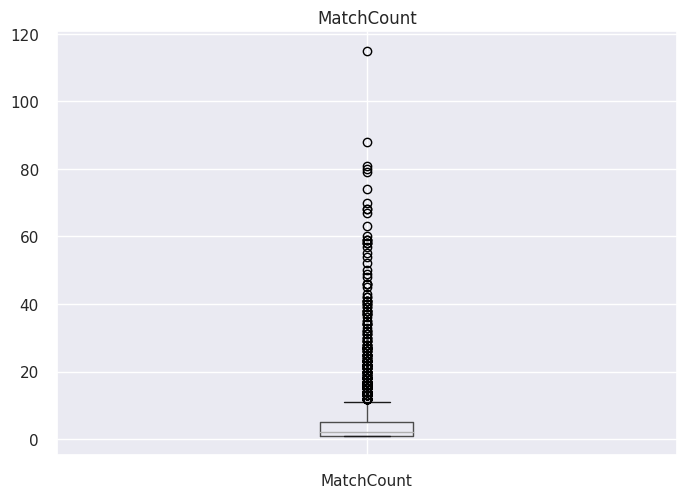

In [ ]:
plt.figure()
teamstats.boxplot("MatchCount")
plt.title("MatchCount")
plt.show()

In [ ]:
teamstats["MatchCount"].describe()

count    2103.000000
mean        5.629101
std         9.671746
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       115.000000
Name: MatchCount, dtype: float64

In [ ]:
teamstats[teamstats.isna().any(axis=1)]

Empty DataFrame
Columns: [TeamID, MatchCount, WinRate, Avg_TotalRound, Avg_Econ, Avg_HS_Percent]
Index: []

## K-Means Clustering

In [ ]:
# memilih fitur dan melakukan scaling
x = teamstats[['WinRate', 'MatchCount']]
scaler = MinMaxScaler()

scaled = scaler.fit_transform(x)
x = pd.DataFrame(scaled, columns=x.columns)

In [ ]:
best_k = compute_silhouette_coef(x, 2, 6)
print(best_k)

Komparasi silhouette coefficient untuk k berbeda:
Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.6810963219843843


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.7127904430153711
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.7176775482580273


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.7398203481668032
Untuk k = 6, rata-rata silhouette_coefficient adalah: 0.7467771590275347
6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

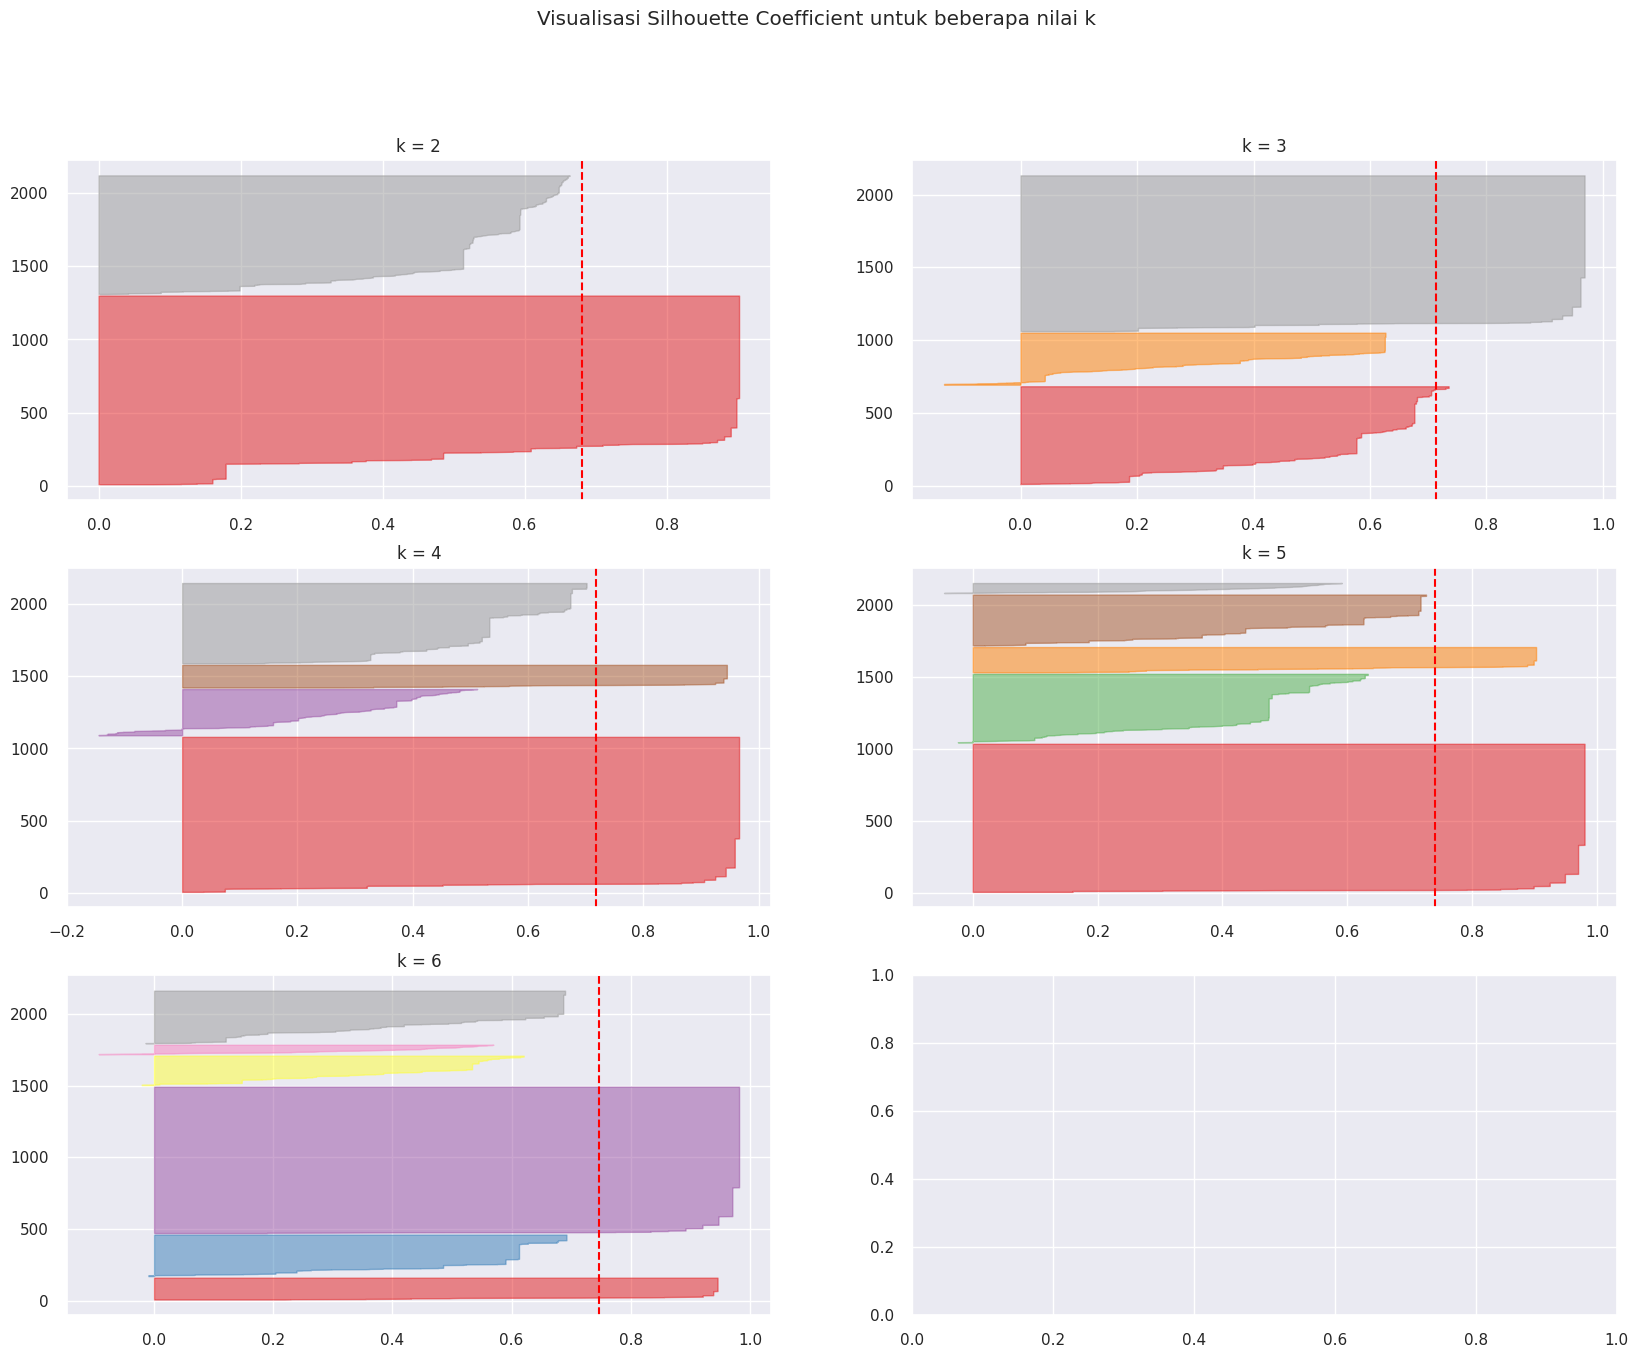

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20,15))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k")
for k in [2, 3, 4, 5, 6]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k)

    # Memvisualisasikan densitas tiap klaster yang terbentuk
    q, mod = divmod(k, 2)
    ax[q-1][mod].set_title(f"k = {k}")
    visualizer = SilhouetteVisualizer(clusterer, ax = ax[q-1][mod])
    visualizer.fit(x)

In [ ]:
# mendefinisikan kmeans dengan n terbaik dari sillhouette coefficient
kmeans_n2 = KMeans(n_clusters=best_k)
cluster_assignment_n2 = kmeans_n2.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Append hasil clustering ke dataframe
df_with_5clusters = pd.DataFrame(x.copy())
df_with_5clusters['Cluster'] = cluster_assignment_n2
df_with_5clusters.head()

WinRate  MatchCount  Cluster
0  0.686957    1.000000        5
1  0.704545    0.763158        5
2  0.814815    0.701754        5
3  0.725000    0.692982        5
4  0.848101    0.684211        5

In [ ]:
# fungsi untuk generate warna yang digunakan pada visualisasi

import random
def generate_random_color():
    color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
    return color

def generate_colors(n):
  cluster_colors = {}
  for i in range (n):
    cluster_colors[i] = generate_random_color()
  return cluster_colors



### Visualisasi Hasil Clustering

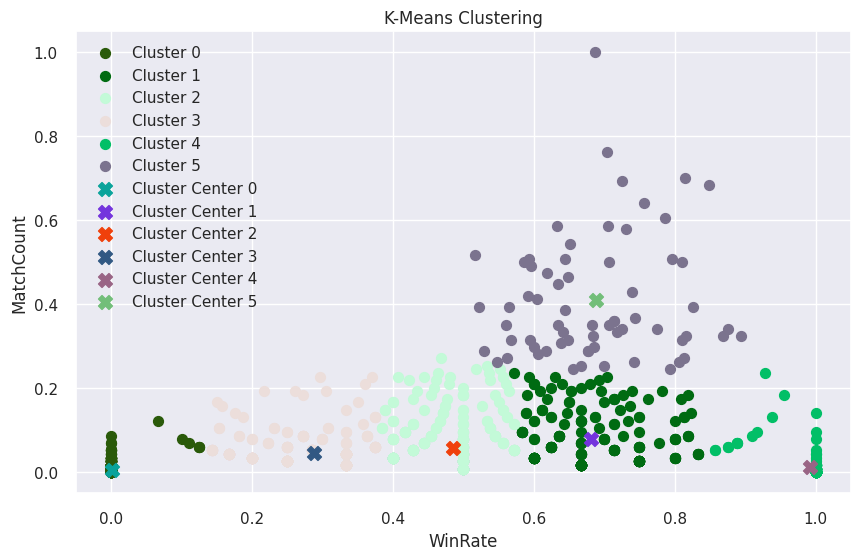

In [ ]:
# TODO: Tunjukkan plot berdasarkan hasil clustering yang sudah dilakukan.
cluster_colors = generate_colors(best_k)

plt.figure(figsize=(10, 6))

for cluster, color in cluster_colors.items():
   cluster_data = df_with_5clusters[df_with_5clusters['Cluster'] == cluster]
   plt.scatter(cluster_data['WinRate'], cluster_data['MatchCount'], c=color, label=f'Cluster {cluster}', s=50)

center_colors = generate_colors(best_k)
for center, color in center_colors.items():
   center_cluster = kmeans_n2.cluster_centers_[center]
   plt.scatter(center_cluster[0], center_cluster[1], c=color, label=f'Cluster Center {center}', marker='X', s=100)

plt.xlabel('WinRate')
plt.ylabel('MatchCount')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

### Penjelasan Tiap Cluster

In [ ]:
df_per_cluster = []
for i in range(best_k):
  df_per_cluster.append(df_with_5clusters.loc[df_with_5clusters['Cluster'] == i])

In [ ]:
for i in range(best_k):
  print('Klaster', i)
  print(df_per_cluster[i].describe())
  print()

Klaster 0
           WinRate   MatchCount  Cluster
count  1021.000000  1021.000000   1021.0
mean      0.000639     0.005026      0.0
std       0.008474     0.010896      0.0
min       0.000000     0.000000      0.0
25%       0.000000     0.000000      0.0
50%       0.000000     0.000000      0.0
75%       0.000000     0.008772      0.0
max       0.125000     0.122807      0.0

Klaster 1
          WinRate  MatchCount  Cluster
count  206.000000  206.000000    206.0
mean     0.681468    0.078820      1.0
std      0.067579    0.061739      0.0
min      0.571429    0.017544      1.0
25%      0.625000    0.026316      1.0
50%      0.666667    0.061404      1.0
75%      0.735965    0.122807      1.0
max      0.833333    0.236842      1.0

Klaster 2
          WinRate  MatchCount  Cluster
count  367.000000  367.000000    367.0
mean     0.484699    0.059109      2.0
std      0.044730    0.060730      0.0
min      0.384615    0.008772      2.0
25%      0.462912    0.008772      2.0
50%      0.500

In [ ]:
for i in range(len(df_per_cluster)):
  print(f'Banyaknya data pada klaster {i} adalah {df_per_cluster[i].count().Cluster}')

Banyaknya data pada klaster 0 adalah 1021
Banyaknya data pada klaster 1 adalah 206
Banyaknya data pada klaster 2 adalah 367
Banyaknya data pada klaster 3 adalah 290
Banyaknya data pada klaster 4 adalah 153
Banyaknya data pada klaster 5 adalah 66


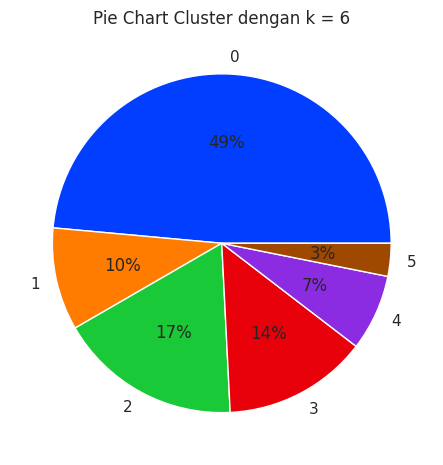

In [ ]:
cluster_count = []
clusters = np.sort(df_with_5clusters.Cluster.unique())

for i in clusters:
  cluster_count.append(df_with_5clusters.Cluster.value_counts()[i])

palette_color = sns.color_palette('bright')
plt.pie(cluster_count, labels=clusters, colors=palette_color, autopct='%.0f%%')
plt.title(f'Pie Chart Cluster dengan k = {best_k}')
plt.show()

## Agglomerative Clustering

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    shc.dendrogram(linkage_matrix, **kwargs)

In [ ]:
model = AgglomerativeClustering(distance_threshold = 0, n_clusters = None, linkage = 'ward', affinity = 'euclidean')
clustering = model.fit(x)
clustering.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1279, 1663, 1255, ...,    6,    2,    0])

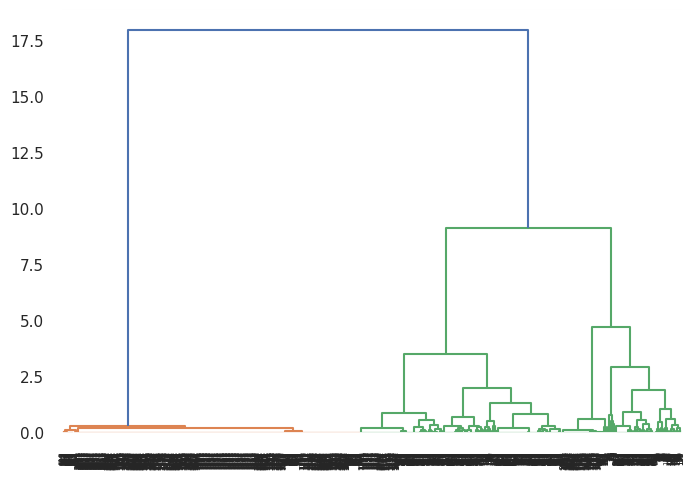

In [ ]:
# TODO: Tampilkan dendrogram dari data yang sudah ada.
plot_dendrogram(model)

In [ ]:
clustering = AgglomerativeClustering(n_clusters=6, linkage='ward', affinity='euclidean')
agg_cluster_assignment = clustering.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
# Append hasil clustering ke dataframe
df_agg_clusters = pd.DataFrame(x.copy())
df_agg_clusters['Cluster'] = agg_cluster_assignment
df_agg_clusters.head()

WinRate  MatchCount  Cluster
0  0.686957    1.000000        5
1  0.704545    0.763158        5
2  0.814815    0.701754        5
3  0.725000    0.692982        5
4  0.848101    0.684211        5

### Visualisasi Hasil Clustering

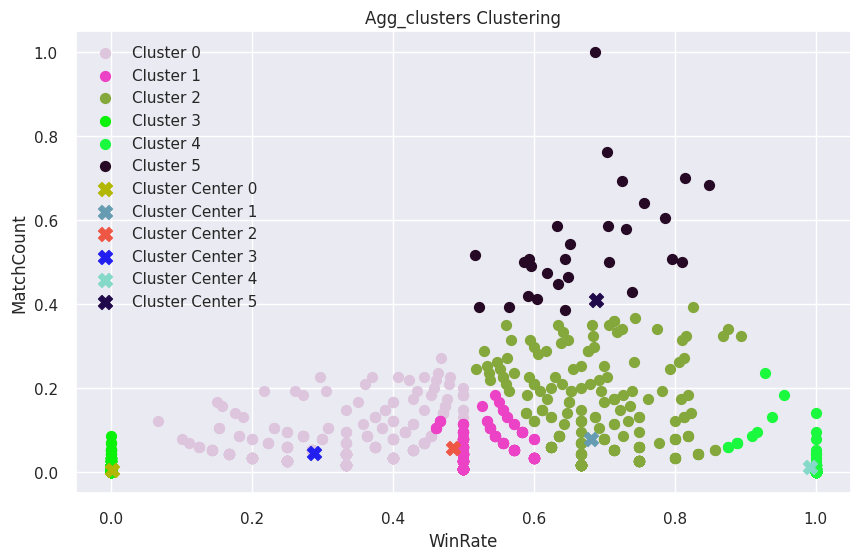

In [ ]:
# TODO: Tunjukkan plot berdasarkan hasil clustering yang sudah dilakukan.
cluster_colors = generate_colors(best_k)

plt.figure(figsize=(10, 6))

for cluster, color in cluster_colors.items():
   cluster_data = df_agg_clusters[df_agg_clusters['Cluster'] == cluster]
   plt.scatter(cluster_data['WinRate'], cluster_data['MatchCount'], c=color, label=f'Cluster {cluster}', s=50)

center_colors = generate_colors(best_k)
for center, color in center_colors.items():
   center_cluster = kmeans_n2.cluster_centers_[center]
   plt.scatter(center_cluster[0], center_cluster[1], c=color, label=f'Cluster Center {center}', marker='X', s=100)

plt.xlabel('WinRate')
plt.ylabel('MatchCount')
plt.title('Agg_clusters Clustering')
plt.legend()
plt.grid(True)
plt.show()

### Penjelasan Tiap Cluster

In [ ]:
df_per_cluster2 = []
for i in range(best_k):
  df_per_cluster2.append(df_agg_clusters.loc[df_agg_clusters['Cluster'] == i])


In [ ]:
for i in range(best_k):
  print('Klaster', i)
  print(df_per_cluster2[i].describe())
  print()

Klaster 0
          WinRate  MatchCount  Cluster
count  404.000000  404.000000    404.0
mean     0.323061    0.059666      0.0
std      0.087331    0.051673      0.0
min      0.066667    0.017544      0.0
25%      0.250000    0.017544      0.0
50%      0.333333    0.043860      0.0
75%      0.400000    0.078947      0.0
max      0.500000    0.271930      0.0

Klaster 1
          WinRate  MatchCount  Cluster
count  279.000000  279.000000    279.0
mean     0.516325    0.038012      1.0
std      0.033901    0.038337      0.0
min      0.461538    0.008772      1.0
25%      0.500000    0.008772      1.0
50%      0.500000    0.026316      1.0
75%      0.500000    0.057018      1.0
max      0.600000    0.184211      1.0

Klaster 2
          WinRate  MatchCount  Cluster
count  226.000000  226.000000    226.0
mean     0.691283    0.127193      2.0
std      0.075686    0.105821      0.0
min      0.517241    0.017544      2.0
25%      0.647456    0.026316      2.0
50%      0.666667    0.087719   

In [ ]:
for i in range(len(df_per_cluster2)):
  print(f'Banyaknya data pada klaster {i} adalah {df_per_cluster2[i].count().Cluster}')

Banyaknya data pada klaster 0 adalah 404
Banyaknya data pada klaster 1 adalah 279
Banyaknya data pada klaster 2 adalah 226
Banyaknya data pada klaster 3 adalah 1015
Banyaknya data pada klaster 4 adalah 151
Banyaknya data pada klaster 5 adalah 28


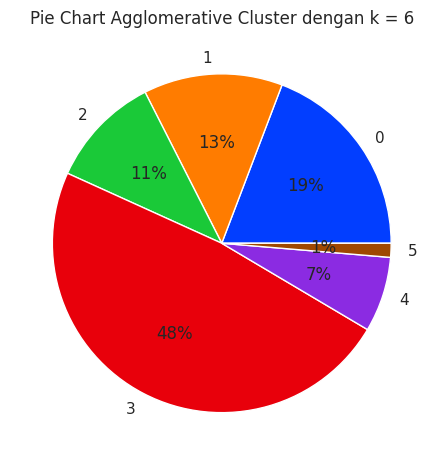

In [ ]:
cluster_count = []
clusters = np.sort(df_agg_clusters.Cluster.unique())

for i in clusters:
  cluster_count.append(df_agg_clusters.Cluster.value_counts()[i])

palette_color = sns.color_palette('bright')
plt.pie(cluster_count, labels=clusters, colors=palette_color, autopct='%.0f%%')
plt.title(f'Pie Chart Agglomerative Cluster dengan k = {best_k}')
plt.show()